## Report: "Can subjective measures such as happiness be used to predict a country's region? A study on indicators from a decade of world data."

### Aims and objectives in carrying out this analysis

<b>Aims:</b> 

<i>To analyse if subjective data - that is data completely formed on the basis of asking people their opinions about their lives such as how happy they perceive their lives to be - can be used as a relevant feature in the classification of countries by region.</i>

This will be achieved by analysing two sub aims:

1) To use a classifier to attempt to accurately classify countries by region based on a combination of both factual data, such as Logged GPD per capita and Healthy life expectancy at birth, and subjective data, such as perceived happiness as measured by The World Happiness Report's 'Life Ladder'.

2) To systematically reduce the dataset to test if the subjective data is relevant to increasing the accuracy in the classification process.


<b>Objectives:</b> 

Achieving this aim will include:
- Using clustering methods such as K-Means clustering to see if regions can be detected within the data, without being given labels.
- Build and test classifiers to classify regions based on the features provided. These features will include factual data as well as subjective data from The World Happiness Report
- Use feature reduction to identify the most important features 
- See how much of an impact the subjective perceived happiness has on classification accuracy by comparing classifications with to classifications without 'Life Ladder' scores.

This analysis is timebound to be completed by 14:00 BST on the 06-09-2021.

The analysis results will be compared and judged on a variety of metrics throughout and finally based on classifier accuracy metrics.

<b><i>Note on aims:</i></b>

My aims are built around the curiosity of whether data which is entirely subjective to a person's point of view can actually be useful as a factor in the classification process and plays into the 'Wisdom of the crowds' concept.

It also plays into my suspicion that we can accurately predict which part of the world the country is in simply if we have certain factual data related to general development and subjective data on people's point of view.

<b><i>Note on data:</i></b>

The dataset used is the 'Full_Happiness_Report_EDA.csv' as created by myself - B. Livermore (2021) - [1] in "How to be happy? A study on indicators from a decade of world data." This was itself created using the base dataset of world happiness data as taken from The World Happiness Report[2] with supplemental factors added to the dataset which are believed to be possible predictors and relevant to data of the countries represented.

The data has already been cleaned although some NaNs were left in certain situations to possibly build a regression model which doesn't necessarily need all data. As I am no longer following the aim of building a regression model, I will likely now remove those columns that still contain NaNs.

In [1]:
# Importing needed tools, libraries etc.
import pandas as pd
import numpy as np

# Importing needed visualization tools and set preferences for visualization style 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
# Ignore all future warnings which some Seaborn functions have been generating
from warnings import simplefilter
simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
# Import dataset from EDA (CW1) with error handling and view
try:
    data = pd.read_csv("Full_Happiness_Report_EDA.csv")
except FileNotFoundError:
    print("File name does not exist.")
data

,Unnamed: 0,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region,IncomeGroup
0,0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.977,4.3,29185507.0,South Asia,Low income
1,1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,5.770,4.1,30117413.0,South Asia,Low income
2,2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,5.562,4.0,31161376.0,South Asia,Low income
3,3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,5.359,4.0,32269589.0,South Asia,Low income
4,4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,5.163,3.9,33370794.0,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1407,Zimbabwe,2015,3.703,7.992,0.736,53.80,0.667,-0.123,0.810,0.715,0.179,3.896,18.0,13814629.0,Sub-Saharan Africa,Lower middle income
1217,1408,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,3.804,16.8,14030390.0,Sub-Saharan Africa,Lower middle income
1218,1409,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,3.707,15.0,14236745.0,Sub-Saharan Africa,Lower middle income
1219,1410,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,3.615,14.0,14439018.0,Sub-Saharan Africa,Lower middle income


In [4]:
# Creating datasets for just the first and last year of the period (2010, 2019) 
data_2019 = data[data['Year']==2019]
data_2010 = data[data['Year']==2010]
data_2010_2019 = pd.concat([data_2019, data_2010])

### Basic visualizations to summarize key points from prior EDA from the "Full_Happiness_Report_EDA.csv"[1]

To begin to analysis, I want to see a quick visualization of where I left off last time with the EDA to show the top 20 countries based on their 'Life Ladder' score.

In [5]:
plt.style.use('dark_background')

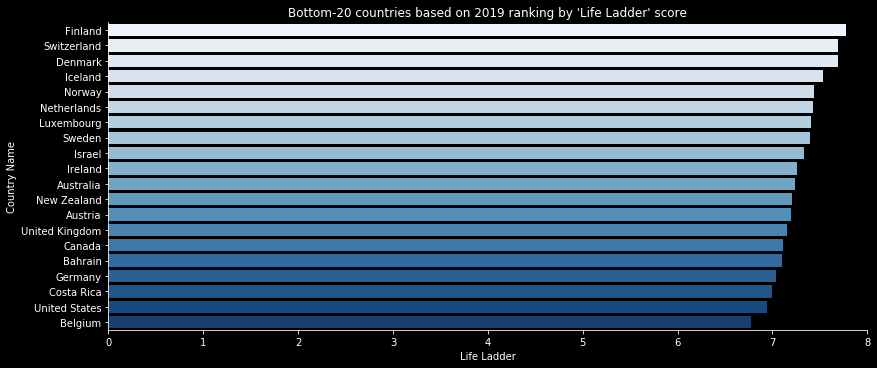

In [6]:
# Create a list of bottom 20 countries by 2019 ranking by 'Life Ladder'
g = sns.catplot("Life Ladder", "Country Name", data=data_2019.sort_values(by='Life Ladder', ascending=False).head(20), palette = 'Blues', kind="bar").set(xlim=(0,8))
g.ax.set_title("Bottom-20 countries based on 2019 ranking by 'Life Ladder' score")
g.fig.set_figwidth(16)

And on the other end of the spectrum, the bottom 20 countries of where I left off last time.

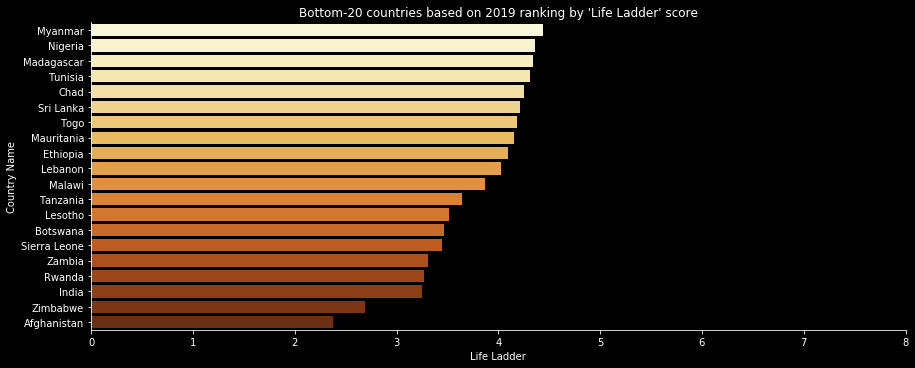

In [7]:
# Create a list of bottom 20 countries by 2019 ranking by 'Life Ladder'
g = sns.catplot("Life Ladder", "Country Name", data=data_2019.sort_values(by='Life Ladder', ascending=False).tail(20), palette = 'YlOrBr', kind="bar").set(xlim=(0,8))
g.ax.set_title("Bottom-20 countries based on 2019 ranking by 'Life Ladder' score")
g.fig.set_figwidth(16)

One point which I noted in the EDA was the tendency of regions to follow a similar pattern to each other with most of the 'happy' countries based on the Life Score coming from richer regions. To visualize this, I decided to create the visualization  again but with the countries grouped by region to see is visual trends appear at the top and bottom of the dataset.

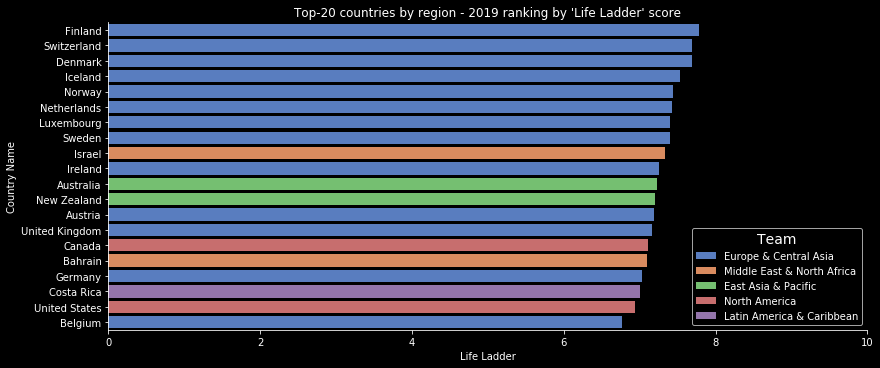

In [8]:
# Showing the list of the top-20 countries based on 2019 ranking by their 'Life Ladder' score
g = sns.catplot("Life Ladder", "Country Name", hue='Region', palette='muted', dodge=False, legend=False, data=data_2019.sort_values(by='Life Ladder', ascending=False).head(20), kind="bar").set(xlim=(0,10))
g.fig.set_figwidth(16)
g.ax.set_title("Top-20 countries by region - 2019 ranking by 'Life Ladder' score")
plt.legend(title='Team', fontsize='10', title_fontsize='14')

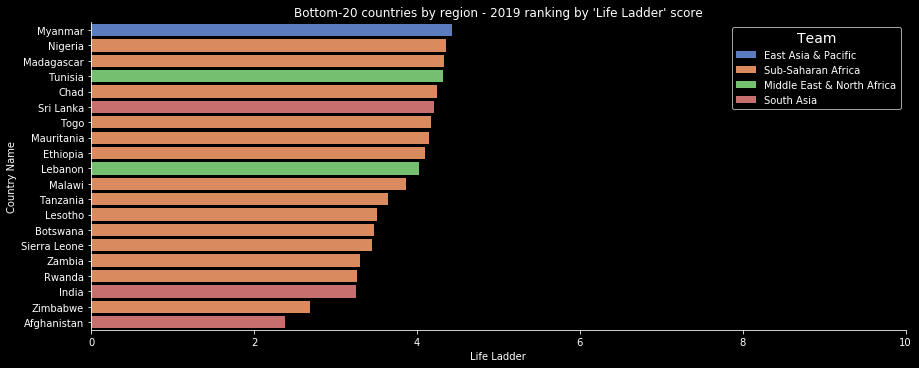

In [9]:
# Showing the list of the bottom-20 countries based on 2019 ranking by their 'Life Ladder' score
g = sns.catplot("Life Ladder", "Country Name", hue='Region', palette='muted', dodge=False, legend=False, data=data_2019.sort_values(by='Life Ladder', ascending=False).tail(20), kind="bar").set(xlim=(0,10))
g.fig.set_figwidth(16)
g.ax.set_title("Bottom-20 countries by region - 2019 ranking by 'Life Ladder' score")
plt.legend(title='Team', fontsize='10', title_fontsize='14')

Visualizing the group mapped by region shows a stark contrast between the regions of the top 20 countries - domintaed by 'Europe and Central Asia' - and the regions of the bottom 20 countries dominated by 'Sub-Saharan Africa' with notable points from 'South Asia' too.

This provided two valuable pieces of information. 

1) Firstly, it confirmed my suspicion of probable high correlations between the regions and a need to investigate this further. 

2) Secondly, it was the first time I realised how broad and over-simplified these regions are. 
   
I had trusted the country groupings as they were taken from a dataset provided by The World Bank[3]. Basic domain knowledge, however, gives a clear indicator that Europe - encompassing wealthy and developed nations as far West as the UK and Iceland - have little in common with nations in Central Asia either culturally, geographically, nor from a development perspective. Other examples of this include 'East Asia and the Pacific', which easily could be divided into three similar - although smaller - regions of 'East Asia', 'Australasia', and 'The Pacific Islands'. 

To really get accurate information from the use of regions, I will need to find a more specific listing of country's regions to sub-divide these into.

### Fixing 'Regions' feature in dataset

The first thing I wanted to do from this point was to find an improved list of regions to modify my dataset with. An online search revealed a much better categorization of regions in the 'Countries of the World'[4] dataset on Kaggle by Fernando Lasso. There are actually various other features I would be interested in including such as 'Coastline (coast/area ratio)' and 'Arable (%)' etc. but as this is only a dataset for one year vs. the ten year period in question and there may well be missing data etc., I will leave them out as a precaution.

In [10]:
# Import dataset with alternative regions list
additional_data = pd.read_csv('countries of the world.csv')

In [11]:
# Visualize data for initial checking and NaN check
print(additional_data['Region'].isna().sum())
print(additional_data['Region'].unique())
additional_data

0
['ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'NORTHERN AFRICA                    '
 'OCEANIA                            '
 'WESTERN EUROPE                     '
 'SUB-SAHARAN AFRICA                 ' 'LATIN AMER. & CARIB    '
 'C.W. OF IND. STATES ' 'NEAR EAST                          '
 'NORTHERN AMERICA                   '
 'BALTICS                            ']


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


Looking at the names of 'Regions' in the above list, it appears formatting errors have been carried into the names. This will need to be fixed. There are a few other potential issues I will also need to resolve/check from this first.

Firstly, I'm curious about what exactly the 'C.W. OF IND. STATES' comprises so want to investigate it to make sure it's a relevant region and not just a group they have put together which don't fit anywhere else.

In [12]:
# View which countries comprise 'C.W. OF IND. STATES'
additional_data.loc[additional_data['Region'] == 'C.W. OF IND. STATES ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"
13,Azerbaijan,C.W. OF IND. STATES,7961619,86600,"91,9","0,00","-4,9","81,74",3400.0,"97,0","137,1","19,63","2,71","77,66",1,"20,74","9,75","0,141","0,457","0,402"
18,Belarus,C.W. OF IND. STATES,10293011,207600,"49,6","0,00","2,54","13,37",6100.0,"99,6","319,1","29,55","0,6","69,85",4,"11,16","14,02","0,093","0,316","0,591"
75,Georgia,C.W. OF IND. STATES,4661473,69700,"66,9","0,44","-4,7","18,59",2500.0,"99,0","146,6","11,44","3,86","84,7",3,"10,41","9,23","0,172","0,275","0,553"
106,Kazakhstan,C.W. OF IND. STATES,15233244,2717300,"5,6","0,00","-3,35","29,21",6300.0,"98,4","164,1","7,98","0,05","91,97",4,16,"9,42","0,067","0,386","0,547"
112,Kyrgyzstan,C.W. OF IND. STATES,5213898,198500,"26,3","0,00","-2,45","35,64",1600.0,"97,0","84,0","7,3","0,35","92,35","2,5","22,8","7,08","0,353","0,208","0,439"
137,Moldova,C.W. OF IND. STATES,4466706,33843,"132,0","0,00","-0,26","40,42",1800.0,"99,1","208,1","55,3","10,79","33,91",NaN,"15,7","12,64","0,213","0,233","0,555"
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4","0,22","1,02","15,39",8900.0,"99,6","280,6","7,33","0,11","92,56",NaN,"9,95","14,65","0,054","0,371","0,575"
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,"51,2","0,00","-2,86","110,76",1000.0,"99,4","33,5","6,61","0,92","92,47",2,"32,65","8,25","0,234","0,286","0,48"
207,Turkmenistan,C.W. OF IND. STATES,5042920,488100,"10,3","0,00","-0,86","73,08",5800.0,"98,0","74,6","3,72","0,14","96,14",1,"27,61","8,6","0,209","0,38","0,411"


This appears to simply be a list of former USSR countries. This is fine although they are known better by their acronym of C.I.S., so I will rename it to this.

Secondly, I noticed when I initially reviewed datasets to choose a new one that this had Cyprus as part of the 'Near East'. I want to explore this group more to see what exactly it contains given that Cyprus wouldn't be a country generally associated with the Near East but much more so with Greece.

In [13]:
# View which countries comprise the 'NEAR EAST'
additional_data.loc[additional_data['Region'] == 'NEAR EAST                          ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
15,Bahrain,NEAR EAST,698585,665,"1050,5","24,21","1,05","17,27",16900.0,"89,1","281,3","2,82","5,63","91,55",1,"17,8","4,14","0,005","0,387","0,608"
52,Cyprus,NEAR EAST,784301,9250,"84,8","7,01","0,43","7,18",19200.0,"97,6",NaN,"7,79","4,44","87,77",3,"12,56","7,68","0,037","0,198","0,765"
74,Gaza Strip,NEAR EAST,1428757,360,"3968,8","11,11","1,6","22,93",600.0,NaN,"244,3","28,95","21,05",50,3,"39,45","3,8","0,03","0,283","0,687"
97,Iraq,NEAR EAST,26783383,437072,"61,3","0,01",0,"50,25",1500.0,"40,4","38,6","13,15","0,78","86,07",1,"31,98","5,37","0,073","0,666","0,261"
100,Israel,NEAR EAST,6352117,20770,"305,8","1,31","0,68","7,03",19800.0,"95,4","462,3","16,39","4,17","79,44",3,"17,97","6,18","0,026","0,317","0,657"
105,Jordan,NEAR EAST,5906760,92300,"64,0","0,03","6,59","17,35",4300.0,"91,3","104,5","2,67","1,83","95,5",1,"21,25","2,65","0,033","0,287","0,68"
111,Kuwait,NEAR EAST,2418393,17820,"135,7","2,80","14,18","9,95",19000.0,"83,5","211,0","0,73","0,11","99,16",1,"21,94","2,41","0,004","0,479","0,516"
115,Lebanon,NEAR EAST,3874050,10400,"372,5","2,16",0,"24,52",4800.0,"87,4","255,6","16,62","13,98","69,4",NaN,"18,52","6,21","0,12","0,21","0,67"
155,Oman,NEAR EAST,3102229,212460,"14,6","0,98","0,28","19,51",13100.0,"75,8","85,5",0,"0,14","99,74",1,"36,24","3,81","0,027","0,39","0,583"
166,Qatar,NEAR EAST,885359,11437,"77,4","4,92","16,29","18,61",21500.0,"82,5","232,0","1,64","0,27","98,09",1,"15,56","4,72","0,002","0,801","0,197"


In [14]:
# Find country of Greece to see what region it is assigned to
additional_data.loc[additional_data['Country'] == 'Greece']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [15]:
# See if country of 'Greece' exists 
'Greece' in additional_data.Country

False

In [16]:
# Attempt to find where where is present and what it is written as (adding '|' as delimiters)
if additional_data.Country.str.contains('Greece').any():
    print ('Greece is present as: |' + additional_data[additional_data.Country.str.contains('Greece')]['Country'] + '|')

79    Greece is present as: |Greece |
Name: Country, dtype: object


While trying to find 'Greece' to check what region it was assigned to add it to Cyprus, I realized that it doesn't exist in the DataFrame (at least not as 'Greece'. After running the above checks to find it, I realized it was present as 'Greece '. After checking the CSV file, I realized all the countries had a ' ' after their name. To avoid future confusion, I decided to fix this by removing them from the country names.

In [17]:
# Find country of 'Greece ' to see what region it is assigned to
additional_data.loc[additional_data['Country'] == 'Greece ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
79,Greece,WESTERN EUROPE,10688058,131940,"81,0","10,37","2,35","5,53",20000.0,"97,5","589,7","21,1","8,78","70,12",3,"9,68","10,24","0,054","0,213","0,733"


In [18]:
# Use r.strip as part of lambda function to remove ' ' from each country
additional_data['Country'] = additional_data['Country'].map(lambda x: x.rstrip(' '))
# Check dataframe to see it all still seems ok
additional_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [19]:
# Check 'Greece' (not 'Greece ') exists within the database
additional_data.loc[additional_data['Country'] == 'Greece']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
79,Greece,WESTERN EUROPE,10688058,131940,"81,0","10,37","2,35","5,53",20000.0,"97,5","589,7","21,1","8,78","70,12",3,"9,68","10,24","0,054","0,213","0,733"


##### Case of concern needing verification
I am concerned the above code may have overridden some of the country names or otherwise caused issues with them. I want to verify the country names are now present as expected so will run the below cells to verify.

In [20]:
# Quick check to see if country names appear as expected (not over stripped etc.). Added '|' to block in names to view spaces.
for country in additional_data['Country']:
    print('|' + country + '|')

|Afghanistan|
|Albania|
|Algeria|
|American Samoa|
|Andorra|
|Angola|
|Anguilla|
|Antigua & Barbuda|
|Argentina|
|Armenia|
|Aruba|
|Australia|
|Austria|
|Azerbaijan|
|Bahamas, The|
|Bahrain|
|Bangladesh|
|Barbados|
|Belarus|
|Belgium|
|Belize|
|Benin|
|Bermuda|
|Bhutan|
|Bolivia|
|Bosnia & Herzegovina|
|Botswana|
|Brazil|
|British Virgin Is.|
|Brunei|
|Bulgaria|
|Burkina Faso|
|Burma|
|Burundi|
|Cambodia|
|Cameroon|
|Canada|
|Cape Verde|
|Cayman Islands|
|Central African Rep.|
|Chad|
|Chile|
|China|
|Colombia|
|Comoros|
|Congo, Dem. Rep.|
|Congo, Repub. of the|
|Cook Islands|
|Costa Rica|
|Cote d'Ivoire|
|Croatia|
|Cuba|
|Cyprus|
|Czech Republic|
|Denmark|
|Djibouti|
|Dominica|
|Dominican Republic|
|East Timor|
|Ecuador|
|Egypt|
|El Salvador|
|Equatorial Guinea|
|Eritrea|
|Estonia|
|Ethiopia|
|Faroe Islands|
|Fiji|
|Finland|
|France|
|French Guiana|
|French Polynesia|
|Gabon|
|Gambia, The|
|Gaza Strip|
|Georgia|
|Germany|
|Ghana|
|Gibraltar|
|Greece|
|Greenland|
|Grenada|
|Guadeloupe|


In [21]:
# Check if any countries still have ' ' at the end of the name
for country in additional_data['Country']:
    if country[-1] == ' ':
        print('|' + country + '|')        
print('All country names are fixed')

All country names are fixed


With the country ' ' name issues fixed, looking through the list of countries in the 'Near East', it seems to be countries which would normally be considered as the 'Middle East' and also Cyprus which would generally be considered economically and culturally part of Europe (particularly close to Greece given the shared culture, language, history, and ties). As such, I will more it to the 'WESTERN EUROPE' group where Greece is located.

Note: It is geographically in Eastern Europe, but as cultural, economic etc. factors are often considered in these categories, I have decided to go with consistency and place it in the same group as Greece, which it is very closely tied to both culturally and historically.

In [22]:
# Change region of Cyprus to Western Europe and check change was successful
additional_data.loc[(additional_data['Country'] == 'Cyprus'), 'Region'] = 'WESTERN EUROPE'
additional_data.loc[additional_data['Country'] == 'Cyprus']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
52,Cyprus,WESTERN EUROPE,784301,9250,"84,8","7,01","0,43","7,18",19200.0,"97,6",NaN,"7,79","4,44","87,77",3,"12,56","7,68","0,037","0,198","0,765"


Now that those issues have been resolved, it is a good opportunity to rename the formatting errors for the region names to aviod errors down the line.

In [23]:
# Fixing Region names
additional_data.Region.replace({'ASIA (EX. NEAR EAST)         ' : 'ASIA (EX. NEAR EAST)', 
                                'EASTERN EUROPE                     ' : 'EASTERN EUROPE', 
                                'NORTHERN AFRICA                    ' : 'NORTHERN AFRICA',
                                'OCEANIA                            ' : 'OCEANIA', 
                                'WESTERN EUROPE                     ' : 'WESTERN EUROPE',
                                'SUB-SAHARAN AFRICA                 ' : 'SUB-SAHARAN AFRICA', 
                                'LATIN AMER. & CARIB    ' : 'LATIN AMER. & CARIB', 
                                'C.W. OF IND. STATES ' : 'C.I.S',
                                'NEAR EAST                          ' : 'MIDDLE EAST', 
                                'NORTHERN AMERICA                   ' : 'NORTH AMERICA', 
                                'BALTICS                            ' : 'BALTICS'}, inplace=True)

In [24]:
print(additional_data['Region'].unique())

['ASIA (EX. NEAR EAST)' 'EASTERN EUROPE' 'NORTHERN AFRICA' 'OCEANIA'
 'WESTERN EUROPE' 'SUB-SAHARAN AFRICA' 'LATIN AMER. & CARIB' 'C.I.S'
 'MIDDLE EAST' 'NORTH AMERICA' 'BALTICS']


Now the names of the regions are looking a lot more user friendly to avoid issues down the road.

The last changes I want to make to these before combining into the original dataset is to redefine 'ASIA (EX. NEAR EAST)' and 'OCEANIA'. I would like to separate out 'South East Asia' and 'Australasia' as separate regions which I feel have distinct cultural ties, economies etc. from the other nations in their regions.

In [25]:
# Change region of Australia and New Zealand to 'AUSTRALASIA'
additional_data.loc[(additional_data['Country'] == 'Australia'), 'Region'] = 'AUSTRALASIA'
additional_data.loc[(additional_data['Country'] == 'New Zealand'), 'Region'] = 'AUSTRALASIA'

# Add region of 'SOUTH EAST ASIA' and assign countries
additional_data.loc[(additional_data['Country'] == 'Brunei'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Burma'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Cambodia'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'East Timor'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Indonesia'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Laos'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Malaysia'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Philippines'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Singapore'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Thailand'), 'Region'] = 'SOUTH EAST ASIA'
additional_data.loc[(additional_data['Country'] == 'Vietnam'), 'Region'] = 'SOUTH EAST ASIA'

# Add region of 'EASTERN ASIA' and assign countries
additional_data.loc[(additional_data['Country'] == 'China'), 'Region'] = 'EASTERN ASIA'
additional_data.loc[(additional_data['Country'] == 'Hong Kong'), 'Region'] = 'EASTERN ASIA'
additional_data.loc[(additional_data['Country'] == 'Macau'), 'Region'] = 'EASTERN ASIA'
additional_data.loc[(additional_data['Country'] == 'Japan'), 'Region'] = 'EASTERN ASIA'
additional_data.loc[(additional_data['Country'] == 'Korea, South'), 'Region'] = 'EASTERN ASIA'
additional_data.loc[(additional_data['Country'] == 'Korea, North'), 'Region'] = 'EASTERN ASIA'
additional_data.loc[(additional_data['Country'] == 'Taiwan'), 'Region'] = 'EASTERN ASIA'

# Rename 'ASIA (EX. NEAR EAST)' to 'CENTRAL AND SOUTHERN ASIA' to reflect changes to group
additional_data.Region.replace({'ASIA (EX. NEAR EAST)' : 'CENTRAL AND SOUTHERN ASIA'}, inplace=True)

##### Case of concern needing verification
I was concerned here about assigning countries to the new regions so wanted to verify each region's contents are as expected.

In [26]:
# Check 'AUSTRALASIA' was successfully assigned
additional_data[additional_data['Region'] == 'AUSTRALASIA']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
11,Australia,AUSTRALASIA,20264082,7686850,"2,6","0,34","3,98","4,69",29000.0,"100,0","565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
149,New Zealand,AUSTRALASIA,4076140,268680,"15,2","5,63","4,05","5,85",21600.0,"99,0","441,7","5,6","6,99","87,41",3,"13,76","7,53","0,043","0,273","0,684"


In [27]:
# Check 'SOUTH EAST ASIA' was successfully assigned
additional_data[additional_data['Region'] == 'SOUTH EAST ASIA']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
29,Brunei,SOUTH EAST ASIA,379444,5770,"65,8","2,79","3,59","12,61",18600.0,"93,9","237,2","0,57","0,76","98,67",2,"18,79","3,45","0,036","0,561","0,403"
32,Burma,SOUTH EAST ASIA,47382633,678500,"69,8","0,28","-1,8","67,24",1800.0,"85,3","10,1","15,19","0,97","83,84",2,"17,91","9,83","0,564","0,082","0,353"
34,Cambodia,SOUTH EAST ASIA,13881427,181040,"76,7","0,24",0,"71,48",1900.0,"69,4","2,6","20,96","0,61","78,43",2,"26,9","9,06","0,35","0,3","0,35"
58,East Timor,SOUTH EAST ASIA,1062777,15007,"70,8","4,70",0,"47,41",500.0,"58,6",NaN,"4,71","0,67","94,62",2,"26,99","6,24","0,085","0,231","0,684"
95,Indonesia,SOUTH EAST ASIA,245452739,1919440,"127,9","2,85",0,"35,6",3200.0,"87,9","52,0","11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408"
113,Laos,SOUTH EAST ASIA,6368481,236800,"26,9","0,00",0,"85,22",1700.0,"66,4","14,1","3,8","0,35","95,85",2,"35,49","11,55","0,455","0,287","0,258"
126,Malaysia,SOUTH EAST ASIA,24385858,329750,"74,0","1,42",0,"17,7",9000.0,"88,7","179,0","5,48","17,61","76,91",2,"22,86","5,05","0,084","0,48","0,436"
162,Philippines,SOUTH EAST ASIA,89468677,300000,"298,2","12,10","-1,5","23,51",4600.0,"92,6","38,4","18,95","16,77","64,28",2,"24,89","5,41","0,144","0,326","0,53"
184,Singapore,SOUTH EAST ASIA,4492150,693,"6482,2","27,85","11,53","2,29",23700.0,"92,5","411,4","1,64",0,"98,36",2,"9,34","4,28",0,"0,339","0,661"
201,Thailand,SOUTH EAST ASIA,64631595,514000,"125,7","0,63",0,"20,48",7400.0,"92,6","108,9","29,36","6,46","64,18",2,"13,87","7,04","0,099","0,441","0,46"


In [28]:
# Check 'EASTERN ASIA' was successfully assigned
additional_data[additional_data['Region'] == 'EASTERN ASIA']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,EASTERN ASIA,1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
91,Hong Kong,EASTERN ASIA,6940432,1092,"6355,7","67,12","5,24","2,97",28800.0,"93,5","546,7","5,05","1,01","93,94",2,"7,29","6,29","0,001","0,092","0,906"
103,Japan,EASTERN ASIA,127463611,377835,"337,4","7,87",0,"3,26",28200.0,"99,0","461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"
109,"Korea, North",EASTERN ASIA,23113019,120540,"191,8","2,07",0,"24,04",1300.0,"99,0","42,4","20,76","2,49","76,75",3,"15,54","7,13","0,3","0,34","0,36"
110,"Korea, South",EASTERN ASIA,48846823,98480,"496,0","2,45",0,"7,05",17800.0,"97,9","486,1","17,18","1,95","80,87",3,10,"5,85","0,033","0,403","0,563"
122,Macau,EASTERN ASIA,453125,28,"16183,0","146,43","4,86","4,39",19400.0,"94,5","384,9",0,0,100,2,"8,48","4,47","0,001","0,072","0,927"
198,Taiwan,EASTERN ASIA,23036087,35980,"640,3","4,35",0,"6,4",23400.0,"96,1","591,0",24,1,75,2,"12,56","6,48","0,018","0,259","0,723"


In [29]:
# Check renaming of 'CENTRAL AND SOUTHERN ASIA' was successful
additional_data[additional_data['Region'] == 'CENTRAL AND SOUTHERN ASIA']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,CENTRAL AND SOUTHERN ASIA,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
16,Bangladesh,CENTRAL AND SOUTHERN ASIA,147365352,144000,"1023,4","0,40","-0,71","62,6",1900.0,"43,1","7,3","62,11","3,07","34,82",2,"29,8","8,27","0,199","0,198","0,603"
23,Bhutan,CENTRAL AND SOUTHERN ASIA,2279723,47000,"48,5","0,00",0,"100,44",1300.0,"42,2","14,3","3,09","0,43","96,48",2,"33,65","12,7","0,258","0,379","0,363"
94,India,CENTRAL AND SOUTHERN ASIA,1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
96,Iran,CENTRAL AND SOUTHERN ASIA,68688433,1648000,"41,7","0,15","-0,84","41,58",7000.0,"79,4","276,4","8,72","1,39","89,89",1,17,"5,55","0,116","0,424","0,46"
127,Maldives,CENTRAL AND SOUTHERN ASIA,359008,300,"1196,7","214,67",0,"56,52",3900.0,"97,2","90,0","13,33","16,67",70,2,"34,81","7,06","0,2","0,18","0,62"
139,Mongolia,CENTRAL AND SOUTHERN ASIA,2832224,1564116,"1,8","0,00",0,"53,79",1800.0,"97,8","55,1","0,77",0,"99,23",1,"21,59","6,95","0,206","0,214","0,58"
145,Nepal,CENTRAL AND SOUTHERN ASIA,28287147,147181,"192,2","0,00",0,"66,98",1400.0,"45,2","15,9","21,68","0,64","77,68",NaN,"30,98","9,31","0,38","0,21","0,41"
156,Pakistan,CENTRAL AND SOUTHERN ASIA,165803560,803940,"206,2","0,13","-2,77","72,44",2100.0,"45,7","31,8","27,87","0,87","71,26",1,"29,74","8,23","0,216","0,251","0,533"
191,Sri Lanka,CENTRAL AND SOUTHERN ASIA,20222240,65610,"308,2","2,04","-1,31","14,35",3700.0,"92,3","61,5","13,86","15,7","70,44",2,"15,51","6,52","0,178","0,276","0,545"


In [30]:
# Display updated regions in 'Region' feature
additional_data.Region.unique()

array(['CENTRAL AND SOUTHERN ASIA', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.I.S', 'AUSTRALASIA', 'MIDDLE EAST',
       'NORTH AMERICA', 'SOUTH EAST ASIA', 'EASTERN ASIA', 'BALTICS'],
      dtype=object)

An important point to note is the number of countries in the two dataframes are different to each other. This is due to the fact some countries were removed from the initial 'data' dataset due to lack of entries etc. I will need to use a left outer join to ensure only countries with matching entries to the original data are added.

In [31]:
# Comparing df lengths
print(len(data_2019))
print(len(additional_data))

126
227


### Merge regions into main dataframe

In [32]:
# Subset dataset to only include 'Country', for merging on, and 'Region' with error handling
try:
    additional_data_region = additional_data[['Country', 'Region']].set_index('Country')
except Exception as e:
    print (e)
else:    
    print(additional_data_region)

                                   Region
Country                                  
Afghanistan     CENTRAL AND SOUTHERN ASIA
Albania                    EASTERN EUROPE
Algeria                   NORTHERN AFRICA
American Samoa                    OCEANIA
Andorra                    WESTERN EUROPE
...                                   ...
West Bank                     MIDDLE EAST
Western Sahara            NORTHERN AFRICA
Yemen                         MIDDLE EAST
Zambia                 SUB-SAHARAN AFRICA
Zimbabwe               SUB-SAHARAN AFRICA

[227 rows x 1 columns]


In [33]:
# Merging original 'data' Dataframe with 'additional_data_region' with error handling
try:
    updated_data = pd.merge(data, additional_data_region, left_on='Country Name', right_on='Country', how='left')
except Exception as e:
    print (e)
else:
    print('Merge successful')

Merge successful


At this point, given some countries have various naming conventions e.g. 'China' vs. 'PR China' vs. 'PRC' etc., I will check to see if any countries from the 'data' dataset have not been assigned a new region.

In [34]:
# Check which countries have been missed when assigning regions
print('No. of countries: ' + str(len(updated_data)))
print('No. of NaNs: ' + str(updated_data['Region_y'].isna().sum()))
print(updated_data[updated_data['Region_y'].isna()]['Country Name'])

No. of countries: 1221
No. of NaNs: 42
140      Bosnia and Herzegovina
141      Bosnia and Herzegovina
142      Bosnia and Herzegovina
143      Bosnia and Herzegovina
144      Bosnia and Herzegovina
145      Bosnia and Herzegovina
146      Bosnia and Herzegovina
147      Bosnia and Herzegovina
148      Bosnia and Herzegovina
149      Bosnia and Herzegovina
220    Central African Republic
221    Central African Republic
222    Central African Republic
223    Central African Republic
749                  Montenegro
750                  Montenegro
751                  Montenegro
752                  Montenegro
753                  Montenegro
754                  Montenegro
755                  Montenegro
756                  Montenegro
757                  Montenegro
758                  Montenegro
773                     Myanmar
774                     Myanmar
775                     Myanmar
776                     Myanmar
777                     Myanmar
778                     Myanmar
7

From here we can see only five countries are missing their new regions. This is likely due to naming differences in the datasets e.g. Myanmar vs. Burma.

I could find the alternative names in the 'additional_data_region' dataset, rename them there, then merge the datasets again. However, given that there are only five and I have a good domain knowledge of countries and their regions, it's quicker to manually rename their regions directly.

In [35]:
# Add regions to missing countries
updated_data.loc[updated_data['Country Name'] == 'Bosnia and Herzegovina', 'Region_y'] = 'EASTERN EUROPE'
updated_data.loc[updated_data['Country Name'] == 'Montenegro', 'Region_y'] = 'EASTERN EUROPE'
updated_data.loc[updated_data['Country Name'] == 'Myanmar', 'Region_y'] = 'SOUTH EAST ASIA'
updated_data.loc[updated_data['Country Name'] == 'North Macedonia', 'Region_y'] = 'EASTERN EUROPE'
updated_data.loc[updated_data['Country Name'] == 'Central African Republic', 'Region_y'] = 'SUB-SAHARAN AFRICA'

In [36]:
# Checking to see all has updated as expected (no NaNs in for region and same length)
print('No. of countries: ' + str(len(updated_data)))
print('No. of NaNs: ' + str(updated_data['Region_y'].isna().sum()))
print(updated_data[updated_data['Region_y'].isna()]['Country Name'])
updated_data.head()

No. of countries: 1221
No. of NaNs: 0
Series([], Name: Country Name, dtype: object)


,Unnamed: 0,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,Region_x,IncomeGroup,Region_y
0,0,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.977,4.3,29185507.0,South Asia,Low income,CENTRAL AND SOUTHERN ASIA
1,1,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,5.770,4.1,30117413.0,South Asia,Low income,CENTRAL AND SOUTHERN ASIA
2,2,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,5.562,4.0,31161376.0,South Asia,Low income,CENTRAL AND SOUTHERN ASIA
3,3,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,5.359,4.0,32269589.0,South Asia,Low income,CENTRAL AND SOUTHERN ASIA
4,4,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,5.163,3.9,33370794.0,South Asia,Low income,CENTRAL AND SOUTHERN ASIA


In [37]:
#Dropping unwanted columns from merge
updated_data.drop(['Region_x', 'Unnamed: 0'],  axis=1, inplace=True)

# Renaming 'Region_y' to 'Region' now it has been updated
updated_data.rename(columns={'Region_y' : 'Region'}, inplace=True)

In [38]:
# Creating updated datasets for just the first and last year of the period (2010, 2019) 
updated_data_2019 = updated_data[updated_data['Year']==2019]
updated_data_2010 = updated_data[updated_data['Year']==2010]
updated_data_2010_2019 = pd.concat([updated_data_2010, updated_data_2019])

In [39]:
# Visually checking update for each worked as expected
updated_data_2019.head()

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,IncomeGroup,Region
9,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502,4.321,4.1,38041754.0,Low income,CENTRAL AND SOUTHERN ASIA
19,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274,1.597,4.3,2854191.0,Upper middle income,EASTERN EUROPE
27,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215,2.988,2.5,43053054.0,Lower middle income,NORTHERN AFRICA
41,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319,2.247,8.4,44938712.0,Upper middle income,LATIN AMER. & CARIB
51,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430,1.758,3.3,2957731.0,Upper middle income,C.I.S


In [40]:
updated_data_2010.head()

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,IncomeGroup,Region
0,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275,5.977,4.3,29185507.0,Low income,CENTRAL AND SOUTHERN ASIA
10,Albania,2010,5.269,9.303,0.733,66.4,0.569,-0.172,0.726,0.648,0.300,1.660,7.8,2913021.0,Upper middle income,EASTERN EUROPE
20,Algeria,2010,5.464,9.287,0.810,64.5,0.593,-0.205,0.618,0.550,0.255,2.860,3.0,35977455.0,Lower middle income,NORTHERN AFRICA
32,Argentina,2010,6.441,10.066,0.927,67.3,0.730,-0.126,0.855,0.846,0.211,2.346,8.6,40788453.0,Upper middle income,LATIN AMER. & CARIB
42,Armenia,2010,4.368,9.136,0.660,65.2,0.459,-0.176,0.891,0.510,0.426,1.722,6.8,2877319.0,Upper middle income,C.I.S


In [41]:
updated_data_2010_2019.head()

,Country Name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population,IncomeGroup,Region
0,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275,5.977,4.3,29185507.0,Low income,CENTRAL AND SOUTHERN ASIA
10,Albania,2010,5.269,9.303,0.733,66.4,0.569,-0.172,0.726,0.648,0.300,1.660,7.8,2913021.0,Upper middle income,EASTERN EUROPE
20,Algeria,2010,5.464,9.287,0.810,64.5,0.593,-0.205,0.618,0.550,0.255,2.860,3.0,35977455.0,Lower middle income,NORTHERN AFRICA
32,Argentina,2010,6.441,10.066,0.927,67.3,0.730,-0.126,0.855,0.846,0.211,2.346,8.6,40788453.0,Upper middle income,LATIN AMER. & CARIB
42,Armenia,2010,4.368,9.136,0.660,65.2,0.459,-0.176,0.891,0.510,0.426,1.722,6.8,2877319.0,Upper middle income,C.I.S


### Break data down by region

If we now recreate our catplots from earlier with the updated regions, we can see a better representation of the trends of our top three richer regions with 'WESTERN EUROPE', 'AUSTRALASIA' (featuring both (2/2) of their countries), and 'NORTH AMERICA' (also featuring both (2/2) of their countries), dominating the life ladder scores. 

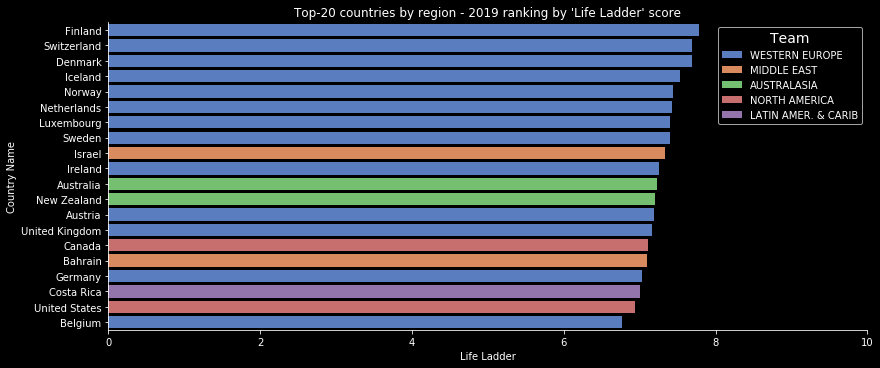

In [42]:
# Showing the list of the top-20 countries based on 2019 ranking by their 'Life Ladder' score
g = sns.catplot("Life Ladder", "Country Name", hue='Region', palette='muted', dodge=False, legend=False, data=updated_data_2019.sort_values(by='Life Ladder', ascending=False).head(20), kind="bar").set(xlim=(0,10))
g.fig.set_figwidth(16)
g.ax.set_title("Top-20 countries by region - 2019 ranking by 'Life Ladder' score")
plt.legend(title='Team', fontsize='10', title_fontsize='14')

In contrast, at the opposite end of the happiness spectrum, we see the bottom of the Life Ladder scores are dominated by countries from the 'SUB-SAHARAN AFRICA', and 'CENTRAL AND SOUTHERN ASIA' regions.

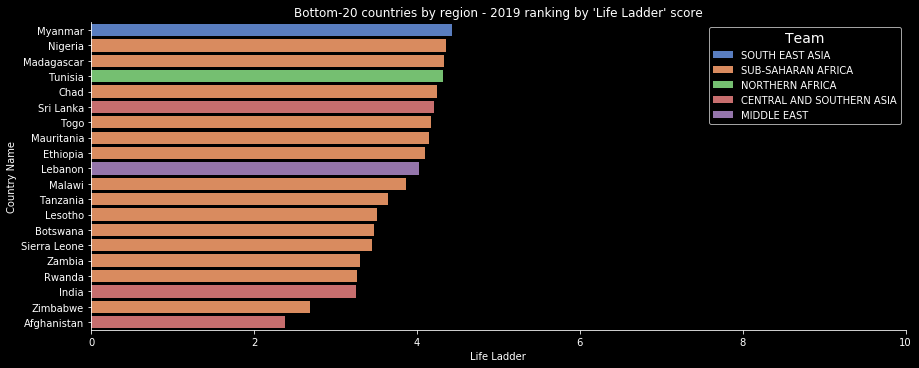

In [43]:
# Showing the list of the bottom-20 countries based on 2019 ranking by their 'Life Ladder' score
g = sns.catplot("Life Ladder", "Country Name", hue='Region', palette='muted', dodge=False, legend=False, data=updated_data_2019.sort_values(by='Life Ladder', ascending=False).tail(20), kind="bar").set(xlim=(0,10))
g.fig.set_figwidth(16)
g.ax.set_title("Bottom-20 countries by region - 2019 ranking by 'Life Ladder' score")
plt.legend(title='Team', fontsize='10', title_fontsize='14')

As my aim is to analyse the data by region, I will need to group the countries by their specific region.

Analysing the whole dataset (all years from 2010-2019) together in one summary table may lead to inaccurate representations as not all countries are present in all 10 years of the period  and thus would result  in some countries having a higher weighting on the final totals.

As such, I will be doing the initial analysis on the 2019 data (most recent) and making the assumption this holds relatively true over the whole period. From at least a high level regional perspective, this should hold relatively true.

In [44]:
# Grouping 2019 data by region
grouped_2019 = updated_data_2019.groupby('Region')

### High level analysis of trends in the regions

From here, I want to look for some initial higher level trends in the data. 

Are certain regions consistently featuring in the top of all features? Are the new variables I added in the EDA ('Fertility Rate', 'Suicide Rate', 'Population'), which were not part of the 'World Happiness Report' also correlated in the same way and could be a potential feature? etc.

For simplicity, given the number of features, I have not included the results of each feature below, but have picked out several key features of interest.

In [45]:
# View summary data of region by 'Life Ladder' score
round(grouped_2019['Life Ladder'].describe(), 2).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
AUSTRALASIA,2.0,7.22,0.02,7.20,7.21,7.22,7.23,7.23
NORTH AMERICA,2.0,7.03,0.12,6.94,6.99,7.03,7.07,7.11
WESTERN EUROPE,20.0,7.01,0.57,5.95,6.63,7.18,7.43,7.78
LATIN AMER. & CARIB,18.0,6.18,0.34,5.65,5.96,6.10,6.41,7.00
BALTICS,3.0,6.02,0.05,5.97,6.00,6.04,6.05,6.06
MIDDLE EAST,8.0,5.89,1.27,4.02,4.77,6.33,6.81,7.33
EASTERN EUROPE,11.0,5.77,0.57,5.00,5.25,6.00,6.19,6.66
SOUTH EAST ASIA,8.0,5.54,0.66,4.43,5.26,5.45,6.08,6.38
EASTERN ASIA,2.0,5.53,0.54,5.14,5.34,5.53,5.72,5.91


This is effectively a list of which regions have scored better in the 'Life Ladder' - perceived happiness score, based on mean average of the regions.

As can be seen from the top three - 'AUSTRALASIA', 'NORTH AMERICA', and 'WESTERN EUROPE', it appears the wealth of a nation is  potentially a driving factor in perceived happiness by The World Happiness Report as these effectively comprise what is viewed as the 'Western' or 'Developed' world. Interestingly, they also have quite low std scores, suggesting they share a lot of characteristics/economic ties etc. with little deviation from each other.

Likewise, on the opposite end of the perceived happiness spectrum, 'NORTHERN AFRICA', 'SUB-SAHARAN AFRICA', and 'CENTRAL AND SOUTHERN ASIA' are generally considered to be comprised of some of the least developed and poorest, nations in the world.

To follow up on this - if wealth does play the leading factor in perceived 'happiness', and therefore suggesting correlation, I will next investigate the 'Log GDP per capita' by region.

In [46]:
# View summary data of region by 'Log GDP per capita'
round(grouped_2019['Log GDP per capita'].describe(), 2).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
NORTH AMERICA,2.0,10.92,0.17,10.80,10.86,10.92,10.98,11.04
WESTERN EUROPE,20.0,10.86,0.30,10.32,10.67,10.87,10.95,11.65
AUSTRALASIA,2.0,10.74,0.11,10.67,10.70,10.74,10.78,10.82
BALTICS,3.0,10.46,0.10,10.34,10.42,10.51,10.51,10.52
MIDDLE EAST,8.0,10.38,0.66,9.20,10.08,10.66,10.77,11.11
EASTERN ASIA,2.0,10.16,0.67,9.69,9.92,10.16,10.40,10.63
EASTERN EUROPE,11.0,10.06,0.35,9.54,9.76,10.05,10.35,10.56
LATIN AMER. & CARIB,18.0,9.51,0.50,8.60,9.11,9.53,9.89,10.36
SOUTH EAST ASIA,8.0,9.49,1.01,8.39,8.88,9.24,9.93,11.49


As expected, the top three remain unchanged (although with a different order amongst each other) - 'AUSTRALASIA', 'NORTH AMERICA', and 'WESTERN EUROPE'. They also have remarkably low std scores - although the data is logged which would explain away a portion of that - and a point to note, despite being logged even their 25th percentile score is higher than all other regions mean average and all bar the 'MIDDLE EAST's 75th percentile, suggesting there is quite a gap between these three and the rest of the world in GDP per capita.

Likewise, we have the exactly same bottom three, also with a changed order - 'NORTHERN AFRICA', 'SUB-SAHARAN AFRICA', and 'CENTRAL AND SOUTHERN ASIA'. As with their richer counterparts, the poorest have been deemed the least happy here.

This trend is actually quite visible throughout the middle regions too with the 'BALTICS', 'MIDDLE EAST', 'C.I.S' etc. all having the same or similar spots with regional logged GDP per capita to ladder score.

What does this tell us? It suggests that 'Log GDP per capita' has a high correlation with the 'Life ladder' - perceived happiness scores. This in turn suggests, although not definitively, that GDP per capita possibly has a high impact on how happy we perceive our lives to be. It should, however, be noted that 'Log GDP per capita' has a high correlation with many of the other features in the dataset. These in turn may have causation or correlation with 'Life Ladder' scores. So at this point the data suggests 'Log GDP per capita' has a potential direct or indirect link to perceived happiness.

The high correlation, or perceived link, between 'Log GDP per capita' and the 'Life Ladder' has often been pointed out as one of the main criticisms of the report on an individual country level by sources such as K. Kushlev et al. (2015)[5] noting more money does not directly lead to higher levels of happiness in the aptly named research article: "Higher Income Is Associated With Less Daily Sadness but not More Daily Happiness", and J. Clifton (2018)[6], Global managing partner at Gallup, who points out that, in the US, money "beyond $75,000, money has much less of an effect on how you live your life".

In other words, The World Happiness Report has often been criticized for the correlation between GDP per capita and happiness and it's obvious placement beside it, although the 'Life Ladder' score is actually a subjective measure in answer to a question related to how happy you perceive your life to be. While this is less relevant to my research as I am not analysing this data in order to build a model using 'Life Ladder' score as a target, it will be interesting to see if this comes up as a key feature correlation in model training. It is also important to note as this possible effect flows from a country level into the region grouping results and highly correlates with several other factors within the dataset.

Feature selection / dimensionality reduction techniques may need to be incorporated as a result of possible covariance between 'Log GDP per capita' and other features.

In [47]:
# View summary data of region by 'Fertility Rate'
round(grouped_2019['Fertility Rate'].describe(), 2).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
WESTERN EUROPE,20.0,1.50,0.20,1.10,1.35,1.50,1.66,1.87
EASTERN ASIA,2.0,1.53,0.24,1.36,1.44,1.53,1.61,1.70
EASTERN EUROPE,11.0,1.54,0.14,1.25,1.48,1.52,1.60,1.76
NORTH AMERICA,2.0,1.59,0.17,1.47,1.53,1.59,1.65,1.70
BALTICS,3.0,1.63,0.03,1.61,1.61,1.61,1.64,1.66
AUSTRALASIA,2.0,1.69,0.04,1.66,1.67,1.69,1.70,1.72
SOUTH EAST ASIA,8.0,2.01,0.48,1.14,1.87,2.09,2.34,2.53
C.I.S,10.0,2.15,0.80,1.23,1.48,1.93,2.77,3.56
LATIN AMER. & CARIB,18.0,2.18,0.34,1.63,1.96,2.24,2.40,2.82


The 'Fertility Rate' by region is one I was interested to check out as it wasn't part of the original World Happiness Report data, but rather one I added in as I believed it may have correlation and has the possibly to be a good predictive variable. 

Interestingly, we see a very similar group at the top with 'AUSTRALASIA', 'NORTH AMERICA', and 'WESTERN EUROPE' all making the top four, this time joined by 'EASTERN ASIA', all with relatively low fertility rates.

Likewise, 'NORTHERN AFRICA', 'SUB-SAHARAN AFRICA', and 'CENTRAL AND SOUTHERN ASIA' round out the bottom three again, all with relatively high fertility rates. Their fertility rates are so much higher comparatively with the top end that even their 25th percentile is higher than almost half of the regions in the dataset.

What does this tell us? Nothing in itself. While it is possible to draw conclusions such as 'less children leads to greater perceived happiness', there is also a very high known correlation between a country's GDP per capita, development and fertility rates. So it is quite possible it is simply correlated yet has no causation with happiness whatsoever. It will be interesting to see how this plays in as a factor in model classification.

In [48]:
# View summary data of region by 'Suicide Rate'
round(grouped_2019['Suicide Rate'].describe(), 2).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
NORTHERN AFRICA,4.0,4.38,2.05,2.5,3.10,3.90,5.18,7.2
MIDDLE EAST,8.0,4.54,2.51,1.6,2.70,4.10,6.10,8.9
SOUTH EAST ASIA,8.0,5.70,3.27,2.2,2.78,5.30,7.82,11.2
LATIN AMER. & CARIB,18.0,6.34,4.26,2.1,4.03,5.95,7.42,21.2
SUB-SAHARAN AFRICA,31.0,9.78,12.36,3.1,5.40,6.60,8.90,72.4
CENTRAL AND SOUTHERN ASIA,7.0,10.04,5.20,3.7,6.50,9.00,13.35,17.9
WESTERN EUROPE,20.0,10.96,3.82,3.6,7.85,11.65,13.98,18.3
C.I.S,10.0,10.97,7.19,3.3,4.65,8.60,16.88,21.6
EASTERN ASIA,2.0,11.70,5.09,8.1,9.90,11.70,13.50,15.3


This is another one I added myself and was keen to analyse. Although I am not an expert in the field, I would logically assume there should be a strong negative correlation between a region's happiness and suicide rate. 

Very interesting to see, looking at the mean averages, there appears to be little correlation (if any it appears to be more positive than negative) with results for the first time being fairly randomly spread out. Unexpectedly, 'NORTH AMERICA', and 'AUSTRALASIA', who have appeared in the top four in every category so far - all of which are generally either directly or indirectly associated with happiness - rank 2nd and 4th to last respectively in regard to highest suicide rates. 

Also, our regions which have been the bottom three in all categories so far, 'NORTHERN AFRICA', 'SUB-SAHARAN AFRICA', and 'CENTRAL AND SOUTHERN ASIA', all appear in the top five with regard to low suicide rate.

Again, I am not looking to primarily prove or disprove relevance of feature choice or if The World Happiness Report is an effective measure of happiness or not, but this is certainly an odd finding in regard to finding none, to a possible weak positive, correlation between perceived happiness and suicide rate.

A point of note in this regard, which has been pointed out as a criticism with use of suicide rate data is the questionable reliability of it's recording. An example of such is shown by I. Tøllefsen et al (2012)[8] who's main finding was that "there is a lack of systematic assessment of the reliability of suicide statistics." and "The findings support the general under-reporting of suicide. In particular, nationwide studies and comparisons between countries are lacking."

As noted by I. Tøllefsen et al (2012)[8], a large part of the discrepancy in the findings could be attributed to differences in individual country's reporting standards. It is also possible that even cultural or religious views in particular societies to suicide lead to differences in a likelihood a person has to commit suicide, thus skewing the results more than as an indicator of happiness. 

As a result of this, I will include these in my analysis as a point of note/interest for now, but I may place less weight on this measure due to it's possible bias and suspect it will be removed during the feature selection stage as less related as a predictor of 'Life Ladder' score.

In [49]:
# View summary data of region by 'Population'
round(grouped_2019['Population'].describe(), 0).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
BALTICS,3.0,2011619.0,738492.0,1326898.0,1620360.0,1913822.0,2.353980e+06,2.794137e+06
EASTERN EUROPE,11.0,8730741.0,11022589.0,622028.0,2471288.0,4065253.0,8.373451e+06,3.796548e+07
C.I.S,10.0,14052661.0,14168866.0,2663251.0,4275643.0,9369434.0,1.639133e+07,4.438620e+07
AUSTRALASIA,2.0,15172522.0,14415394.0,4979300.0,10075911.0,15172522.0,2.026913e+07,2.536574e+07
MIDDLE EAST,8.0,19916042.0,27538335.0,1641172.0,6193556.0,9412264.0,1.614340e+07,8.342962e+07
WESTERN EUROPE,20.0,21315351.0,26823361.0,360563.0,5244432.0,9579404.0,2.479204e+07,8.309296e+07
NORTHERN AFRICA,4.0,24499248.0,17940671.0,6777452.0,10465402.0,24083244.0,3.811709e+07,4.305305e+07
SUB-SAHARAN AFRICA,31.0,27758661.0,39674634.0,850886.0,6375294.0,16296364.0,2.866767e+07,2.009636e+08
LATIN AMER. & CARIB,18.0,32616070.0,53554390.0,2948279.0,6476540.0,11126029.0,2.912085e+07,2.110495e+08


Population was the last indicator I added myself with the null hypothesis (H0), that is has no impact on happiness whatsoever. Nonetheless, it might potentially have some use in classification of regions and can easily be remove if not.

Looking over the results here, it appears, at least initially, that this holds true - that there is little to no impact between a regions population and happiness score. Nonetheless, it will be interesting to carry through as a variable to see if the null will be disproven and seeing if population does have an impact (maybe through overcrowding etc.)

### Feature correlation by region

Following this initial high level analysis of some of the indicators against regions, it is time to delve deeper and see what feature correlation exist between regions.

Text(0.5, 1.0, 'Cumulative Life Ladder Score by region')

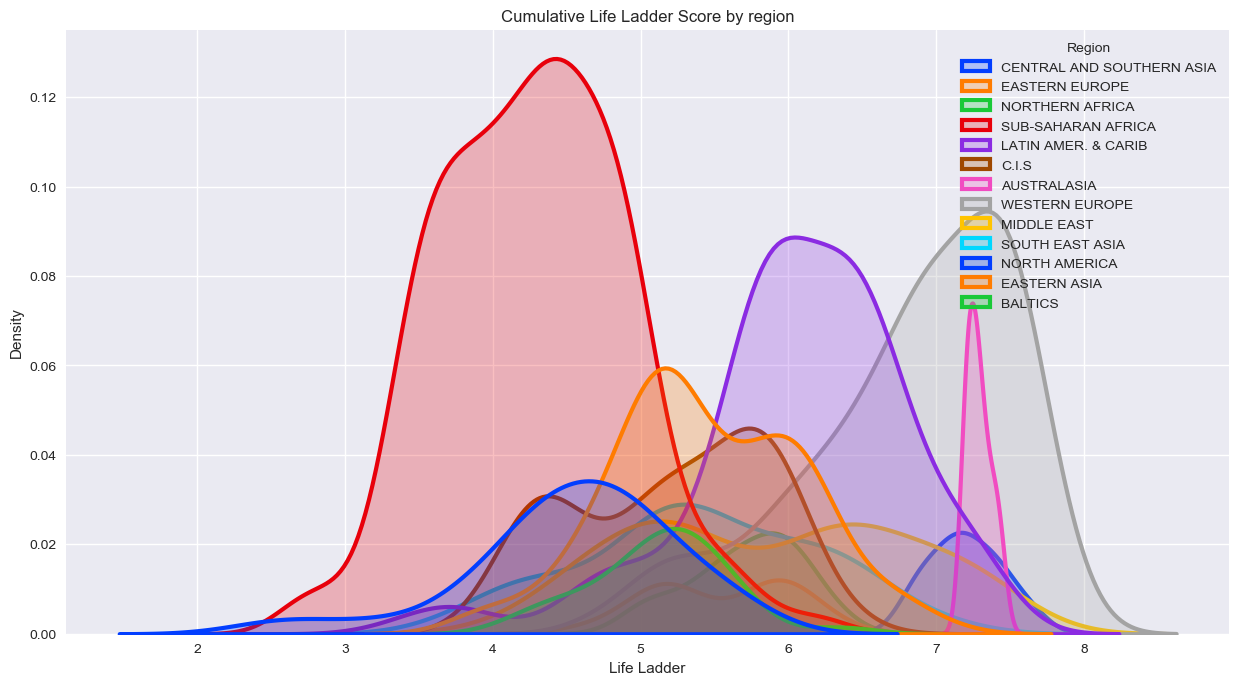

In [50]:
# Visualize cumulative distribution of Life Ladder by region
plt.style.use('seaborn')
plt.figure(figsize = (15, 8), dpi = 100);
# Create kernel density plot
ax = sns.kdeplot(data = updated_data, x = updated_data['Life Ladder'], hue = updated_data['Region'],  palette = 'bright', linewidth = 3, legend = True, fill = True)
ax.set_title("Cumulative Life Ladder Score by region")

Going through the correlation between each feature and each region would be a very repetitive process producing results for features which in many cases have little correlation to the region's perceived happiness. To help focus on the key feature correlations for each region for the report I will first look at the feature correlation over the whole dataset with countries grouped by region to see the trends before going into each region specifically.

To help test if the subjective 'Life Ladder' value is a useful classification indicator, I'm particularly interested in which features correlate the most with 'Life Ladder' scores. Seeing which features correlate highly with each other may also shed some light on the data for regional classification.

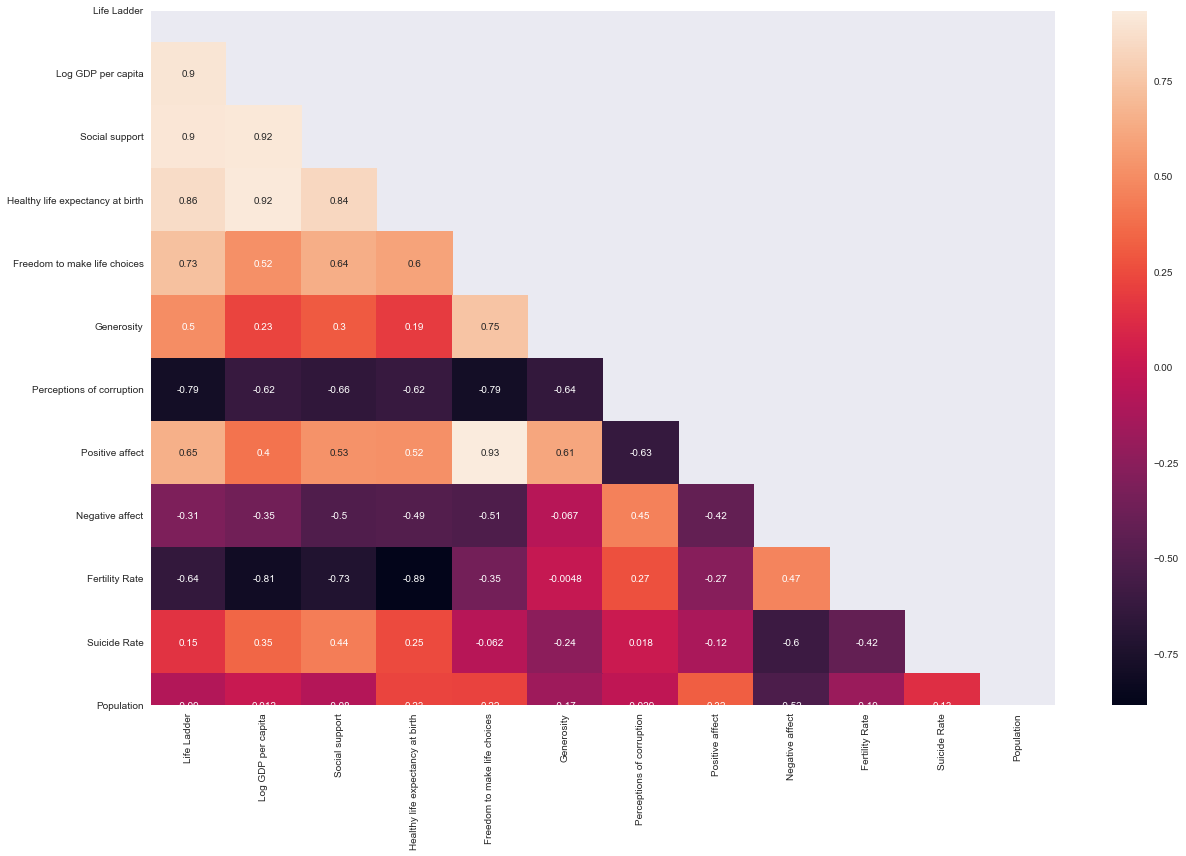

In [51]:
# Group the whole 'updated_data' dataset by region across all years
grouped_all_years = updated_data.drop('Year', axis=1).groupby('Region')
# Create correlation of each variable against data grouped by region
regional_correlation = grouped_all_years.mean().corr()
plt.figure(figsize=(18,12));
# Create mask for heatmap to only get 1 set of correlations
regional_mask = np.triu(regional_correlation)
# Create heatmap of grouped data correlation with above mask applied
sns.heatmap(regional_correlation, annot=True, mask = regional_mask)
plt.tight_layout()  

In [52]:
# Show correlations with only 'Life Ladder'
round(regional_correlation['Life Ladder'],2)

Life Ladder                         1.00
Log GDP per capita                  0.90
Social support                      0.90
Healthy life expectancy at birth    0.86
Freedom to make life choices        0.73
Generosity                          0.50
Perceptions of corruption          -0.79
Positive affect                     0.65
Negative affect                    -0.31
Fertility Rate                     -0.64
Suicide Rate                        0.15
Population                         -0.09
Name: Life Ladder, dtype: float64

Looking at the heatmap of feature correlation, there are some interesting high correlations amongst the variables.

Very high correlations to 'Life Ladder' score can be seen in 'Log GDP per capita' and 'Social support' at .90 and 'Healthy life expectancy at birth' at 0.86. These are very high correlations, suggesting there is quite possibly a link between them which I will explore specifically. Other reasonably correlations to 'Life Ladder' are 'Perceptions of corruption' at -0.79 and 'Freedom to make life choices' at 0.73.

In [53]:
# Show correlations with only 'Log GDP per capita'
round(regional_correlation['Log GDP per capita'],2)

Life Ladder                         0.90
Log GDP per capita                  1.00
Social support                      0.92
Healthy life expectancy at birth    0.92
Freedom to make life choices        0.52
Generosity                          0.23
Perceptions of corruption          -0.62
Positive affect                     0.40
Negative affect                    -0.35
Fertility Rate                     -0.81
Suicide Rate                        0.35
Population                          0.01
Name: Log GDP per capita, dtype: float64

In [54]:
round(regional_correlation['Healthy life expectancy at birth'],2)

Life Ladder                         0.86
Log GDP per capita                  0.92
Social support                      0.84
Healthy life expectancy at birth    1.00
Freedom to make life choices        0.60
Generosity                          0.19
Perceptions of corruption          -0.62
Positive affect                     0.52
Negative affect                    -0.49
Fertility Rate                     -0.89
Suicide Rate                        0.25
Population                          0.23
Name: Healthy life expectancy at birth, dtype: float64

Interesting, 'Log GDP per capita' also has very high correlations among other features with an even higher correlation of .92 with 'Social support' and 'Healthy life expectancy at birth'. 

Likewise, 'Healthy life expectancy at birth' has a 0.84 correlation with 'Social support'. 

The fact the three features, 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth' all have high correlation (>=0.84) suggests a possible covariance between the features with potentially only one (or none) of them having any type of cause and effect relationship with 'Life Ladder' score.

Other interesting points to note include 'Fertility Rate', one of the variables I added in to the dataset which wasn't included in the initial World Happiness report, having a correlation ranging between 0.73 and 0.89 with the three above mentioned variables and 0.64 with the 'Life Ladder' score, suggesting it may well have a relationship with perceived happiness.

'Perceptions of corruption' is also fairly highly correlated with 'Life Ladder' at 0.79 and ranging from 0.62 to 0.67 with the above three features. This could also suggest a possible link.

'Freedom to make life choices' also has various mid-high range correlations and a particularly high, 0.93, correlation to 'Positive affect', although this initially looks to suggests covariance more than causation at this point.

#### Further investigating relationship between 'Life Ladder' and it's three highest correlations - 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth'

The visualizations below are based on the 2019 data to avoid clutter on the scatter graph and to avoid unequal weightings on countries which have more year entries than others.

As the main aim is to find if there are existing patterns within regions which we can use to classify them and seeing if 'Life Ladder' scores are relevant to these regional classifications, visualizing the correlations between key features and 'Life Ladder' scores is a good first indicator of if the data is forming into natural groups or clusters. If this is the case, predicting regions with features such as 'Life Ladder's score and it's highly correlated partners may prove to be achievable through the means of clustering algorithms such as k-means.

Text(0.5, 1.0, 'Log GDP per capita vs. Life Ladder for 2019')

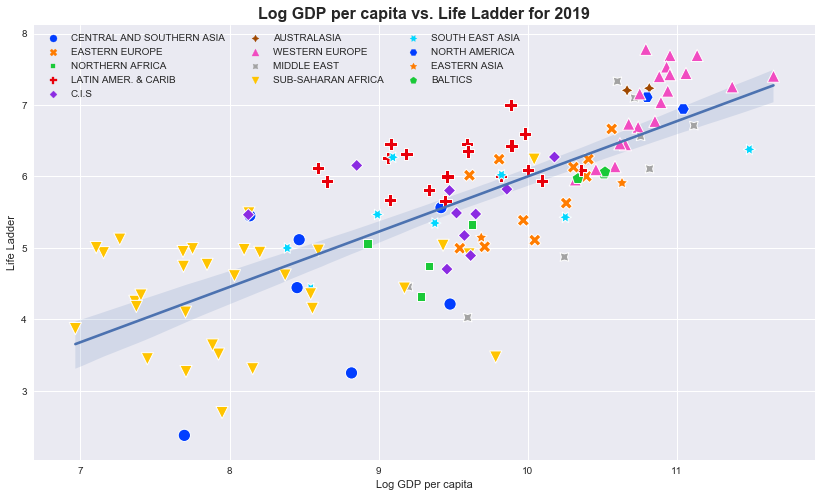

In [55]:
# Visualizing a scatterplot of 'Log GDP per capita' vs. 'Life Ladder' for 2019 data
plt.figure(figsize=(14,8))
# Adding regression line
sns.regplot(data = updated_data_2019, x = 'Log GDP per capita', y = 'Life Ladder', scatter = False)
# Creating actual scatterplot
sns.scatterplot(data = updated_data_2019, hue = 'Region', x = 'Log GDP per capita', y = 'Life Ladder', style = 'Region', s = 150, palette = 'bright');
plt.legend(ncol = 3, fontsize = 10);
plt.title('Log GDP per capita vs. Life Ladder for 2019', fontsize = 16, fontweight = 'bold')

'Log GDP per capita' vs. 'Life Ladder' had a 0.90 correlation across all years in the dataset. This very strong correlation is clearly visible here in the 2019.

An interesting point is the distribution of regions. Many of the regions have very clear groupings/clusters, as was expected to be seen, such as 'Western Europe', 'Australasia' and 'North America', clustered in the top right (richer and a higher perception of happiness), 'Sub-Saharan Africa' clustered reasonably well - although with a higher std - in the bottom right (poor and a lower perception of happiness)

We can also see some clear clustering in some of the middle regions with 'LATIN AMER. & CARIB' and 'BALTICS' for example clustering quite well around the middle of the data.

There are, however, some regions which have wider distributions such as the 'MIDDLE EAST' and 'SOUTH EAST ASIA' which have points spread across a wide variety of the data.

While not all regions are well clustered, the fact many of the regions have clear clusters between two features with a 0.90 correlation is a promising sign for being able to predict a country's region using data which includes perceived happiness.

Text(0.5, 1.0, 'Social support vs. Life Ladder for 2019')

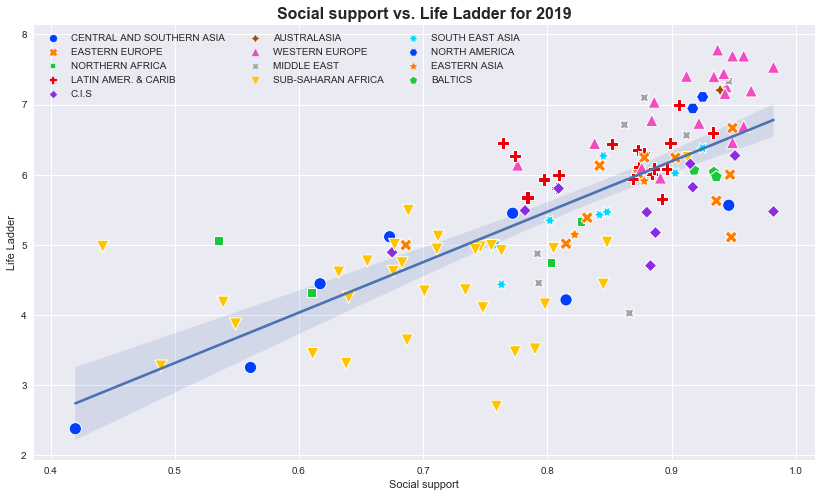

In [56]:
# Visualizing a scatterplot of 'Social support' vs. 'Life Ladder' for 2019 data
plt.figure(figsize = (14,8))
# Adding regression line
sns.regplot(data = updated_data_2019, x = 'Social support', y = 'Life Ladder', scatter = False)
# Creating actual scatterplot
sns.scatterplot(data = updated_data_2019, hue = 'Region', x = 'Social support', y = 'Life Ladder', palette = 'bright', style = 'Region', s = 150);
plt.legend(ncol = 3, fontsize = 10);
plt.title('Social support vs. Life Ladder for 2019', fontsize = 16, fontweight = 'bold')


'Social Support' was the other feature with the joint highest, 0.90, correlation with 'Life Ladder'. 

Visualizing the data, it is also possible to see a clear correlation between the two features. 

In terms of regional clustering, there are still visible clusters, particularly the 'BALTICS' and 'NORTH AMERICA', but generally the clusterings seems to be more loosely clustered than with 'Log GDP per capita' vs. 'Life Ladder for 2019' with a large amount of countries generally clustered in the top right or the distribution. 

It's certainly possible it may prove useful for region based predictions, at the very least if used as a weak learner in an ensemble.

Text(0.5, 1.0, 'Healthy life expectancy at birth vs. Life Ladder for 2019')

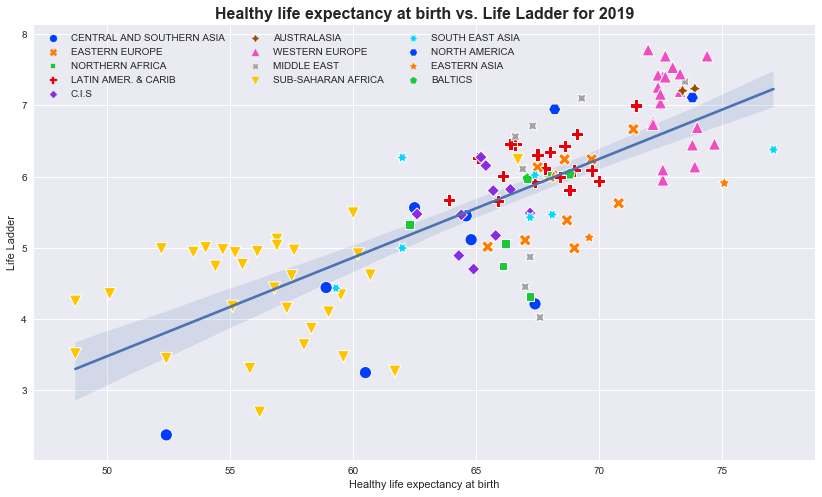

In [57]:
# Visualizing a scatterplot of 'Healthy life expectancy at birth' vs. 'Life Ladder' for 2019 data
plt.figure(figsize=(14,8))
# Adding regression line
sns.regplot(data = updated_data_2019, x = 'Healthy life expectancy at birth', y = 'Life Ladder', scatter = False)
# Creating actual scatterplot
sns.scatterplot(data = updated_data_2019, hue = 'Region', x = 'Healthy life expectancy at birth', y = 'Life Ladder', palette = 'bright', style = 'Region', s = 150);
plt.legend(ncol = 3, fontsize = 10);
plt.title('Healthy life expectancy at birth vs. Life Ladder for 2019', fontsize = 16, fontweight = 'bold')

Finally, the third very high correlation, 0.86, with 'Healthy life expectancy at birth'

Looking at this data, not only can we see a clear correlation but also some very good regional clusters. 'SUB-SAHARAN AFRICA' is almost entirely clustered at the bottom left (a less healthy life expectancy at birth to less perceived happiness score), regions like 'C.I.S.' and 'BALTICS' well clustered in the middle, and 'WESTERN EUROPE' and 'AUSTRALASIA' clearly clustering in the upper right corner (a healthy life expectancy at birth with a higher perceived happiness score).

This looks very promising as a trend from a predictive level to find correlation with perceived happiness based on their region and will be interesting to run through clustering algorithms to see how well it identifies regions.

### Standardization of features for next steps

To follow up the results of the visualization of key feature correlation, I will see if clustering algorithms can use unsupervised learning to identify clusters within the data. While this doesn't seem overly likely to work given the range of regions, it will be interesting to see how it performs.

Before this is done, I would like to standardize the features of the data as some of the features have very high numbers in comparison to others. For example population, which to this point hasn't been logged, standardized etc. will potentially have a huge influence on deciding the clusters each data point is deemed 'closest to'. To avoid this, I will first need to standardize the data.

In [58]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Setting X and y values for the data
# X values of two most highly correlated factors
updated_data_2019 = updated_data_2019.dropna()
X_simple = updated_data_2019.iloc[:,2:4]
# X values of all factors
X_all = updated_data_2019.iloc[:,2:14]
y = updated_data_2019.loc[:,'Region']

In [60]:
# Creating a MinMaxScaler and fit-Transforming the data to it
scaler = MinMaxScaler()
scaled_2019_data = scaler.fit_transform(X_simple)
scaled_2019_data_all = scaler.fit_transform(X_all)

In [61]:
# Convert to DataFrame and drop any potential NaNs which may be in the columns
scaled_2019_data = pd.DataFrame(scaled_2019_data).dropna()
scaled_2019_data_all = pd.DataFrame(scaled_2019_data_all).dropna()

In [62]:
scaled_2019_data_all

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.156130,0.000000,0.130282,0.015385,0.212941,0.956327,0.051146,1.000000,0.562718,0.028450,0.027584
1,0.484736,0.550619,0.473310,0.714789,0.670085,0.223529,0.945129,0.633157,0.373626,0.086827,0.031294,0.001825
2,0.438483,0.506408,0.681495,0.612676,0.000000,0.345882,0.751400,0.463845,0.211538,0.329839,0.005690,0.031252
3,0.686586,0.648014,0.846975,0.714789,0.738462,0.091765,0.851064,0.888889,0.497253,0.200384,0.089616,0.032633
4,0.575948,0.545921,0.644128,0.651408,0.784615,0.137647,0.574468,0.486772,0.802198,0.114955,0.017070,0.001901
...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.781684,0.643528,0.912811,0.718310,0.885470,0.228235,0.592385,1.000000,0.230769,0.150769,0.271693,0.002270
118,0.699167,0.403033,0.880783,0.588028,1.000000,0.697647,0.493841,0.922399,0.225275,0.294375,0.083926,0.024318
119,0.572063,0.432721,0.761566,0.683099,0.969231,0.191765,0.804031,0.756614,0.131868,0.165968,0.076814,0.070350
120,0.172433,0.253951,0.387900,0.250000,0.728205,0.430588,0.853303,0.742504,0.703297,0.604298,0.073969,0.012811


### K-Means clustering - Attempting to identify regions with unsupervised learning

KMeans is designed to find clusters within the data based on near by data points. In theory, this could be useful to identify the 13 regions within the dataset if they truly are distinct enough to identify the groups of country by region. 

However, KMeans starts it's process by randomly placing it's initial data values and simply assigning nearest data points to them. This not only means that it will produce different results each time, but also that it isn't particularly likely to identify the regions within the dataset unless they are very distinct from one another. 

Nevertheless, it will be our starting point in attempting to identify regions within the data. I rather than using the whole dataset, I will use only the two highest correlated figures as a starting point - 'Log GDP per capita' vs. 'Life Ladder' with 2019 as a starting point for consistency with what was tested above. If it performs well, I will expand it to include more factors over the whole dataset.

In [63]:
# Importing KMeans
from sklearn.cluster import KMeans

In [64]:
# Setting KMeans and fit-predicting the data
y_pred = KMeans(n_clusters = 13, random_state = 1).fit_predict(scaled_2019_data)

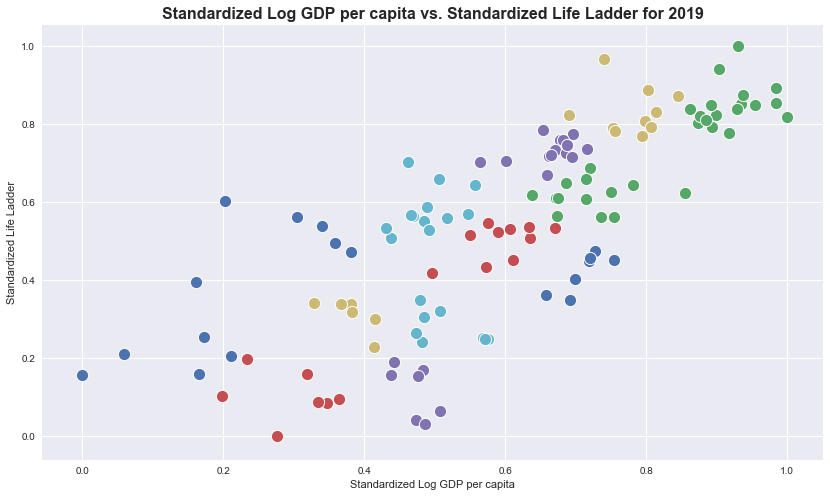

In [65]:
# Plotting results of KMeans clustering
plt.figure(figsize = (14, 8))
regional_labels = np.unique(y_pred)
# Initiate for loop to plot each prediction on the scatterplot
for i in regional_labels:
    sns.scatterplot(data = scaled_2019_data, x = scaled_2019_data[y_pred == i][0] , y = scaled_2019_data[y_pred == i][1], palette = 'bright', s = 150)
plt.title('Standardized Log GDP per capita vs. Standardized Life Ladder for 2019', fontsize = 16, fontweight = 'bold')
plt.ylabel('Standardized Life Ladder')
plt.xlabel('Standardized Log GDP per capita')
plt.show()

As can be seen from the clusters above when n is set to the number of regions, k-Means clustering doesn't identify the regions well.

This is not entirely a surprise as k-Means is an unsupervised learning algorithm which doesn't know what it's looking for in the data. It has simple found 13 clusters and matched the nearest points to them without taking into account and factors such as size, which would make clusters like 'AUSTRALASIA', a region of two countries with very similar characteristics to 'WESTERN EUROPE' and 'NORTH AMERICA' extremely hard to identify. Add to this the fact that many of the regions in the centre of the data aren't as clearly defined and it is not surprising that k-Means clustering is likely to perform poorly in such a task.

While k-Means clustering may not be suitable for this task, it may still be possible to gain something valuable from k-Means clustering. It may well be useful at identify unknown clusters within the data which could later be used in region prediction etc.

To use this to optimal efficiency, it's important to have the optimal parameter choice set. While I can likely safely stick to the default Euclidean distance measure given the nature of the data, choosing the optimal k-value is the key issue. To do this, I will use the 'Elbow Method' to attempt to find the optimal k-value for this dataset.

#### Using the 'Elbow Method'

In [66]:
## Measure SSE at different values of k to generate Elbow Plot to find optimal k value
# Create empty list to store SSE / distrotion values 
SSE = []
# Set k range for anywhere from 1 to 13 (actual number of regions)
K_value = range(1, 13)
# Create loop to rotate through each value of k to record and store SSE
for k in K_value:
    kmeans_Model = KMeans(n_clusters = k, random_state = 1)
    kmeans_Model.fit(scaled_2019_data)
    SSE.append(kmeans_Model.inertia_)

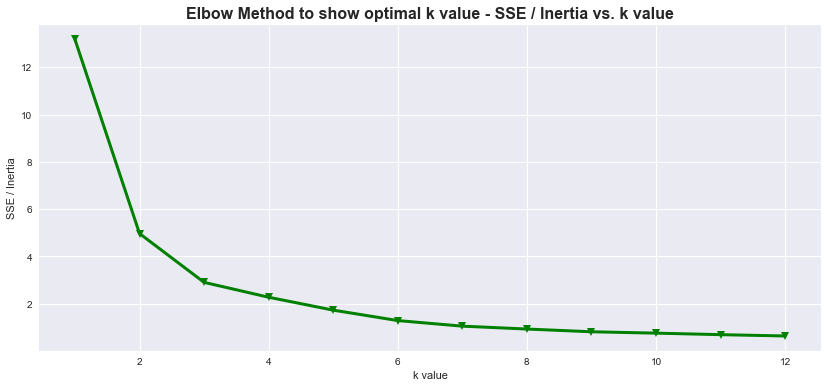

In [67]:
# Plot the 'Elbow method' to visualize results
plt.figure(figsize = (14, 6))
plt.plot(K_value, SSE, marker = 'v', markersize = 8, linewidth = 3, color = 'green')
plt.title('Elbow Method to show optimal k value - SSE / Inertia vs. k value', fontsize = 16, fontweight = 'bold')
plt.ylabel('SSE / Inertia')
plt.xlabel('k value')
plt.show()

Looking at the Elbow Curve, we can see the optimal k value for this dataset is 3. 

Given the optimal value is less than 1/4 of the number of regions in the dataset, this obviously help us achieve our goal of identifying regions within the dataset. 

Nonetheless, I will set the k value to 3 to see what general clusters it identifies within the data.

In [68]:
# Running k-Means again with n = 3
y_pred = KMeans(n_clusters = 3, random_state = 1).fit_predict(scaled_2019_data)

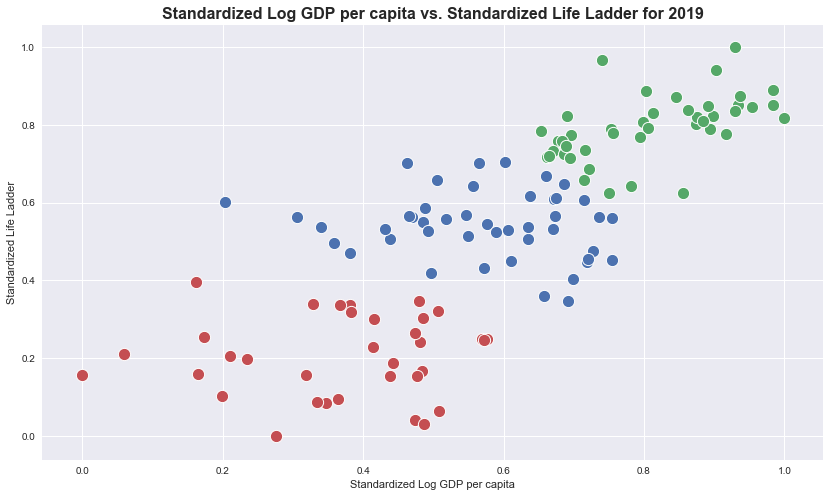

In [69]:
#Getting unique labels
plt.figure(figsize = (14, 8))
regional_labels = np.unique(y_pred)
for i in regional_labels:
    sns.scatterplot(data = scaled_2019_data, x = scaled_2019_data[y_pred == i][0] , y = scaled_2019_data[y_pred == i][1] , palette = 'bright', s = 150)
plt.title('Standardized Log GDP per capita vs. Standardized Life Ladder for 2019', fontsize = 16, fontweight = 'bold')
plt.ylabel('Standardized Life Ladder')
plt.xlabel('Standardized Log GDP per capita')
plt.show()

As can be seen from this iteration of the data, KMeans has divided the data broadly effectively into three bands of low, mid, and high score in both categories.  

While this may provide some use 

### Further research into clustering algorithms

Following on from the poor clustering results with KMeans clustering, I decided to test alternative clustering algorithms. M. Mujiya Ulkhaq & A. Adyatama (2020)[7] produced a research article, Clustering countries according to the world happiness report 2019, on this published in the Engineering and Applied Science Research (2021). They investigated the use of multiple clustering algorithms - k-Means, k-Means++, k-Medoids, Clustering large applications (CLARA), Agglomerative nesting (AGNES), Divisive analysis (DIANA), Affinity propagation, Spectral clustering, and Density-based  spatial  clustering  of  applications  with  noise (DBSCAN).

Their results for which was the 'best' algorithm were mixed, sighting five different algorithms based on various criteria and stating:

<p><i>"These results are not unanticipated since the differences in the previous internal validation indices make it hard to compare in the same environment. Some scholars showed that there is no single internal validation index which surpasses other indices. Therefore, it is not recommended to proclaim “the best” algorithm when comparing clustering algorithms."</i></p> - Engineering and Applied Science Research 2021;48(2), page 145[7].

<p><i>"Note that there is no “the best” clustering algorithm. k-medoids (PAM) that was selected   as   a   representative   of   the  algorithm   to   show   the interpretation  of  its  result  was  rather  chosen  arbitrarily."</i></p> - Engineering and Applied Science Research 2021;48(2), page 147[7].

While the research article did provide a good comparative look at a variety of algorithms of the World Happiness Report, their inability to definitely narrow down the 'best' algorithm to cluster regions by to over half of the total tested was a little disappointing and hasn't provided a great deal of guidance on clustering algorithm selection for the task.

An interesting point of note is the fact the vast majority of the clustering algorithms they used found (or were decided to optimally have) three clusters within the data [Appendix 1.0], just as I found with KMeans.

As the aim of my study is to find an accurate identifier of regions (of which their are 13), these seem unlikely to achieve the aim of successfully being able to identify such specific clusters within the data. However, one of their clustering algorithms, Affinity propagation (which self-identifies the number of clusters within the data), found exactly 13 clusters within the data [Appendix 2.0].

Looking up further analysis of clustering on the World Happiness Report to see if Affinity propagation consistently finds larger numbers of clusters within the data, I found similar results such as with R. Gust, Clustering on the World Happiness Report 2019[9], who found 12 clusters within his data, and the work of C. Klecker (2019) in 'Building A Classification Model Using Affinity Propagation'[10] who found it works well on small datasets.

This is certainly an interesting and potentially relevant find. I will therefore use the Affinity propagation algorithm on my dataset to see if it is able to identify the regions within the data. 

### Affinity Propagation

In [70]:
# Importing needed AffinityPropagation algorithm
from sklearn.cluster import AffinityPropagation

I will first test AffinityPropagation on only the two most highly correlated variables "Life Ladder" vs. "Log GDP per capita" (normalized) to see how it performs on these.

In [71]:
# Create and fit AffinityPropagation 
affinity_prop = AffinityPropagation(max_iter=200)
affinity_prop.fit(scaled_2019_data)

# Make predictions with AffinityPropagation
affinity_predictions = affinity_prop.predict(scaled_2019_data)

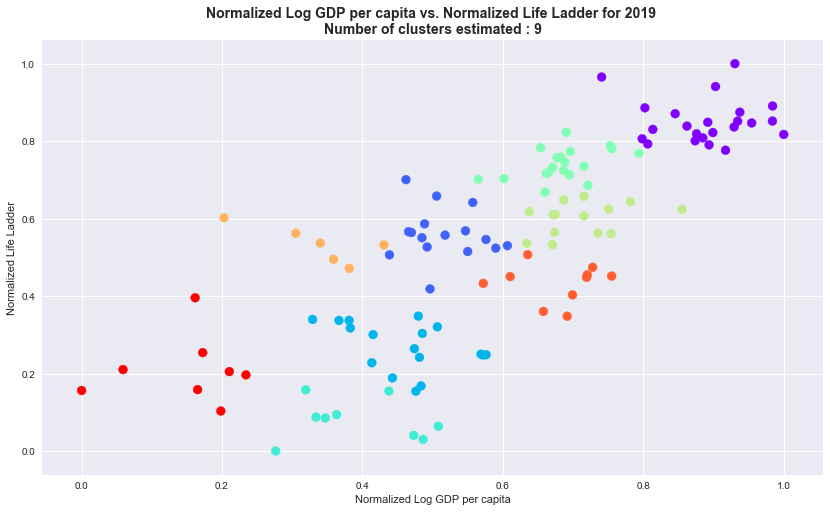

In [72]:
# Generate scatter plot for training data
plt.figure(figsize = (14, 8))
plt.scatter(scaled_2019_data.iloc[:,0], scaled_2019_data.iloc[:,1], c = affinity_predictions, cmap="rainbow", s = 80)
plt.title('Normalized Log GDP per capita vs. Normalized Life Ladder for 2019 \n' f'Number of clusters estimated : {len(affinity_prop.cluster_centers_indices_)}', fontsize = 14, fontweight = 'bold')
plt.ylabel('Normalized Life Ladder')
plt.xlabel('Normalized Log GDP per capita')
plt.show()

As can be seen from the results above, while it hasn't successfully identified the 13 regions as clusters within the data, it has certainly done a better job than KMeans did. 

It has identified nine clusters within the data. Some of these do seem to have reasonable resemblance to regions within the data. For example, the top right (purple) cluster appears to largely correlate with 'WESTERN EUROPE', 'AUSTRALASIA', and 'NORTH AMERICA' quite well. It hasn't be able to distinguish the two smaller regions within the cluster ('AUSTRALASIA', and 'NORTH AMERICA'), although this isn't entirely surprising given their smaller size of two countries each.

The results are nonetheless encouraging. I will now run the whole dataset (all variables - normalized) through AffinityPropagation and compare the results.

In [73]:
# Create and fit AffinityPropagation 
affinity_prop = AffinityPropagation(max_iter=200)
affinity_prop.fit(scaled_2019_data_all)
scaled_2019_data_all
# Make predictions
affinity_predictions = affinity_prop.predict(scaled_2019_data_all)

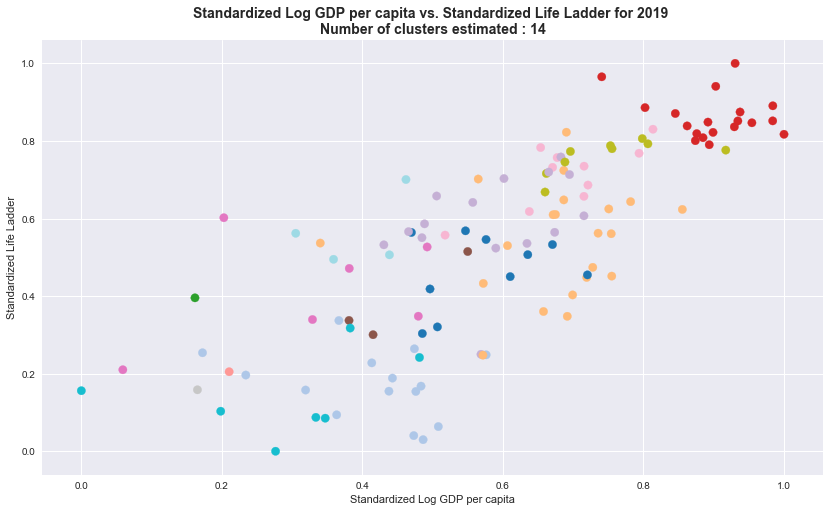

In [74]:
# Generate scatter plot for training data
plt.figure(figsize = (14, 8))
plt.scatter(scaled_2019_data_all.iloc[:,0], scaled_2019_data_all.iloc[:,1], c = affinity_predictions, cmap="tab20", s = 70)
plt.title('Standardized Log GDP per capita vs. Standardized Life Ladder for 2019 \n' f'Number of clusters estimated : {len(affinity_prop.cluster_centers_indices_)}', fontsize = 14, fontweight = 'bold')
plt.ylabel('Standardized Life Ladder')
plt.xlabel('Standardized Log GDP per capita')
plt.show()

AffinityPropagation found what it deemed 14 clusters within the dataset. This is very close to the 13 regions which I have created and is a promising find given that I somewhat subjectively made those regions which could definite be broken down into 14 by splitting 'SOUTHERN AND CENTRAL ASIA' if needed. 

While the number of clusters is a positive sign, looking at the groupings however, they don't seem to equate particularly well with the regions in the dataset. It does seem to have had some success in general identification grouping the three most developed regions into one cluster in the top right and seems to have some success identifying what looks like 'C.I.S' and a few others, but as a whole the clusters don't seem to identify the 13 regions particularly accurately.

### Moving on from unsupervised to supervised techniques

After experimenting with clustering techniques, I will now move on to some supervised learning techniques using classifier algorithms on the data. These are algorithms specifically designed for classification using training data to make predictions rather than clustering which was using unsupervised learning to simply look for similarities within the data.

I expect these will return better results than their clustering counterparts.

The first method I will try on the data is the popular KNN (K nearest neighbour) method to see if it can successfully identify the regions after being trained on the training set.

### KNN (K Nearest Neighbour)

In [75]:
# Import necessary libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
# Import necessary libraries for training data
from sklearn.model_selection import train_test_split
# Import necessary libraries scoring accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, accuracy_score

The below helper code are functions designed to produce easy to read confusion matrices and analysis info which will be used throughout the evaluation process.

In [76]:
## Helper Code
# Create function to return confusion matrix
def get_con_matrix(y_test, predictions):
    '''
    y_test (series or list): Set of correct labels
    predictions (series or list): Set of predicted labels
    
    A function which takes a set of correct labels and predictions and returns the corresponding confusion matrix in an easily readable form.
    '''
    # Create confusion matrix
    con_matrix = confusion_matrix(y_test, predictions)
    predictions = pd.DataFrame(predictions)
    # Stylize the matrix for readability
    con_matrix = pd.DataFrame(con_matrix, index=y_test.sort_values().unique(), columns=y_test.sort_values().unique()).style.set_table_styles(
    [dict(selector="th",props=[('max-width', '180px')]),
        dict(selector="th.col_heading",
                 props=[("writing-mode", "vertical-rl")])])
    
    return con_matrix

In [77]:
## Helper Code
# Create function to give information for analysis
def get_analysis(y_test, predictions):
    '''
    y_test (series or list): Set of correct labels
    predictions (series or list): Set of predicted labels
    
    A function which takes a set of correct labels and predictions and returns an analysis of the predictions by factor.
    '''
    print(classification_report(y_test, predictions))
    print('Accuracy score:', round(accuracy_score(y_test, predictions), 3))
    return

I've chosen to go with an 80-20 split in the data. This is because, while the full dataset has plenty of data, the 2019 data is a somewhat small sample without a lot to of samples to train on and I don't want to reduce training potential. I want to avoid boostrapping and similar synthetic sampling techniques for now to see if we can work on only authentic data to identify the regions. 

For consistency, I will use the 80-20 split on all algorithms and datasets tested.

In [78]:
# Split data into test and training sets
X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(scaled_2019_data_all, y, test_size=0.20, random_state=1)

The most important aspect of KNN is choosing an optimal k value. To help choose the k value, I will iterate over values of k ranging from 1-15 on the training data to see which generates the best results.

In [79]:
# Test and visualize which K value is the most optimal based on the training data 
# Create empty values to hold k value and accuracy
highest_k_value = 0.0
highest_accuracy = 0.0
# Create loop to itterate through values of k with error handling
try:
    for k in list(range(1,16)):
        # Create KNN classifier
        KNN = KNeighborsClassifier(n_neighbors = k)
        # Fit data and train KNN
        KNN.fit(X_train_2019, y_train_2019)
        train_predictions = KNN.predict(X_train_2019)
        # Record k vallue accuracies
        accuracies = accuracy_score(y_train_2019, train_predictions)
        print('k value: ' + str(k) + ', accuracy: ' +str(round(accuracies, 3)))
        if highest_accuracy < accuracies:
            highest_accuracy = accuracies
            highest_k_value = k
except Exception as e:
    print(e)
else:
    # Display optimal results        
    print('\nOptimal k value = %d, Accuracy: %f' % (highest_k_value, highest_accuracy))

k value: 1, accuracy: 1.0
k value: 2, accuracy: 0.825
k value: 3, accuracy: 0.753
k value: 4, accuracy: 0.784
k value: 5, accuracy: 0.753
k value: 6, accuracy: 0.711
k value: 7, accuracy: 0.701
k value: 8, accuracy: 0.68
k value: 9, accuracy: 0.649
k value: 10, accuracy: 0.66
k value: 11, accuracy: 0.66
k value: 12, accuracy: 0.629
k value: 13, accuracy: 0.608
k value: 14, accuracy: 0.598
k value: 15, accuracy: 0.598

Optimal k value = 1, Accuracy: 1.000000


As can be seen from the k value testing above, the accuracy tends to decrease the higher the k value. Based on this alone, I should use a k value of 1. However, KNN tends to overfit at lower values so I will choose something a little higher than 1. 4 Seems to have a local maximum so is what I would start with based on this. It may still be a little low and suffer from overfitting but I will start with it and test a few values with trail and error to see which gives us the best results.

<i>Having tried a few values from 4 - 10 it seems that 6 actually generates the best results so I have left that as the parameter in the code below but only left the final run to avoid unnecessary clutter.</i>

In [80]:
# Create model and make predictions with KNN on the 2019 test data
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train_2019, y_train_2019)
predictions = KNN.predict(X_test_2019)

In [81]:
# Generate KNN predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_2019, predictions)

,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
BALTICS,0,1,0,0,0,0,0,0,0
C.I.S,0,1,0,0,0,0,0,0,0
CENTRAL AND SOUTHERN ASIA,0,1,0,0,0,0,0,0,0
EASTERN EUROPE,0,0,0,4,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,2,0,0,0,0
NORTHERN AFRICA,0,0,0,0,0,0,0,1,0
SOUTH EAST ASIA,0,1,0,0,1,0,1,0,1
SUB-SAHARAN AFRICA,0,0,0,0,0,0,0,5,0
WESTERN EUROPE,0,0,0,0,0,0,0,0,6


In [82]:
# Generate KNN  prediction analysis of prediction performance by region
get_analysis(y_test_2019, predictions)

                           precision    recall  f1-score   support

                  BALTICS       0.00      0.00      0.00         1
                    C.I.S       0.25      1.00      0.40         1
CENTRAL AND SOUTHERN ASIA       0.00      0.00      0.00         1
           EASTERN EUROPE       1.00      1.00      1.00         4
      LATIN AMER. & CARIB       0.67      1.00      0.80         2
          NORTHERN AFRICA       0.00      0.00      0.00         1
          SOUTH EAST ASIA       1.00      0.25      0.40         4
       SUB-SAHARAN AFRICA       0.83      1.00      0.91         5
           WESTERN EUROPE       0.86      1.00      0.92         6

                 accuracy                           0.76        25
                macro avg       0.51      0.58      0.49        25
             weighted avg       0.76      0.76      0.71        25

Accuracy score: 0.76


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As can be seen from the results above, KNN has predicted the country's regions for the 2019 data with some level of success. 

As a whole, it predicted at around 76% accuracy on the small test dataset available. It also seems to have generally predicted higher success rates on the regions with higher counts, which concerningly suggests it may have a tendency to predict the more likely outcome each time and seldom predict a less likely one, giving it a good accuracy measure but making a poor overall predictor.

With that said, these results were predicted on a very small test set which didn't even include at least one sample of each region (only 9 of the 13 regions have made it to the small test set). These smaller sizes could potentially be the cause of some of the accuracy issues and would certainly need to be rectified if the results are to be taken seriously.

One solution to this could be using a bootstrap with stratified sampling to create a larger testing set with all regions present. While this will help, it will still have the issue on either using a small training set or generating a lot of synthetic data (which could be misleading given the small sample size of some regions).

However, rather than generating synthetic data, I do have the much larger dataset of all years which this can be tested on. Given the reasonable results from KNN here, I will proceed to test it on the larger dataset to see how it responds to a larger dataset to both test and train on.

### KNN on data over all years

In [83]:
# Setting X and y values for the data
# X values of two most highly correlated factors
updated_data = updated_data.dropna()
X_simple_all_years = updated_data.iloc[:,2:4]
# X values of all factors
X_all_years = updated_data.iloc[:,2:14]
y_all_years = updated_data.loc[:,'Region']

# Creating a MinMaxScaler and fit-Transforming the data to it
scaler = MinMaxScaler()
#scaled_simple_all_years = scaler.fit_transform(X_simple_all_years)
scaled_data_all_years = scaler.fit_transform(X_all_years)

In [84]:
# Spllit data into test and train sets
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(scaled_data_all_years, y_all_years, test_size=0.20, random_state=1)

In [85]:
# Test and visualize which K value is the most optimal based on the training data
# Create empty values to hold k value and accuracy
highest_k_value = 0.0
highest_accuracy = 0.0
# Create loop to itterate through values of k with error handling
try: 
    for k in list(range(1,16)):
        # Create KNN classifier
        KNN = KNeighborsClassifier(n_neighbors = k)
        # Fit data and train KNN
        KNN.fit(X_train_all_years, y_train_all_years)
        train_predictions = KNN.predict(X_train_all_years)
        # Record k vallue accuracies
        accuracies = accuracy_score(y_train_all_years, train_predictions)
        print('k value: ' + str(k) + ', accuracy: ' +str(round(accuracies, 3)))
        if highest_accuracy < accuracies:
            highest_accuracy = accuracies
            highest_k_value = k
except Exception as e:
    print(e)
else:        
    # Display optimal results        
    print('\nOptimal k value = %d, Accuracy: %f' % (highest_k_value, highest_accuracy))

k value: 1, accuracy: 1.0
k value: 2, accuracy: 0.983
k value: 3, accuracy: 0.989
k value: 4, accuracy: 0.979
k value: 5, accuracy: 0.977
k value: 6, accuracy: 0.972
k value: 7, accuracy: 0.969
k value: 8, accuracy: 0.965
k value: 9, accuracy: 0.958
k value: 10, accuracy: 0.946
k value: 11, accuracy: 0.937
k value: 12, accuracy: 0.925
k value: 13, accuracy: 0.922
k value: 14, accuracy: 0.905
k value: 15, accuracy: 0.892

Optimal k value = 1, Accuracy: 1.000000


As with the previous run on 2019 data, it tends to get less accurate the further k gets from 1 with no obvious local maximum to lock in on. After a little trial and error, k = 3 seems to give a very high accuracy so have run that on this first pass.

#### First attempt with k value of 3

In [86]:
# Create model and make predictions with KNN on the full test data
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [87]:
# Generate KNN predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,1,0,0,0,0,0,0,0,0,0,0,0,2
BALTICS,0,6,0,0,0,0,0,0,0,0,0,0,0
C.I.S,0,0,20,0,0,0,0,0,0,1,0,0,0
CENTRAL AND SOUTHERN ASIA,0,0,0,18,0,0,0,0,0,0,0,0,0
EASTERN ASIA,0,0,0,0,3,0,0,0,0,0,0,0,0
EASTERN EUROPE,0,0,1,0,0,18,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,41,0,0,0,0,0,0
MIDDLE EAST,0,0,0,0,0,0,0,11,0,0,0,0,0
NORTH AMERICA,0,0,0,0,0,0,0,0,3,0,0,0,1
NORTHERN AFRICA,0,0,0,0,0,0,0,0,0,6,0,0,0


In [88]:
# Generate KNN  prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.33      0.33      0.33         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       0.95      0.95      0.95        21
CENTRAL AND SOUTHERN ASIA       1.00      1.00      1.00        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.95      0.95      0.95        19
      LATIN AMER. & CARIB       1.00      1.00      1.00        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      0.75      0.86         4
          NORTHERN AFRICA       0.86      1.00      0.92         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       1.00      1.00      1.00        55
           WESTERN EUROPE       0.92      0.92      0.92        36

                 accuracy                           0.97    

KNN has returned very good predictions results over the whole dataset now that it has more data to train on. With an overall accuracy of 98% and a weighted average of 98% and 97% for precision and recall respectively, it appears to be a very accurate classifier of countries to to region based on this dataset.

Looking over the confusion matrix, it appears the vast majority of it's mistakes have come from the three most developed regions of 'WESTERN EUROPE', 'AUSTRALASIA', and 'NORTH AMERICA' where it has misclassified 5 of it's 7 misclassification from one of these three regions, into one of these three regions. As these regions consistently had very similar results to each other (as shown on feature comparison) and the fact 'AUSTRALASIA', and 'NORTH AMERICA' only have two countries in each region leading to very little data, it isn't surprising to see some misclassifications here. It's also reasonably to assume that if we had more years of data for it to predict with, or used bootstrapping or synthetic data, it may be able to classify them more accurately.

With the exception of 'AUSTRALASIA', and 'NORTH AMERICA', KNN has performed extremely well across the board in region classification, with the majority of regions being classified as correct 100% of the time, and has still done reasonable well with those regions as well. and in it's own right seemed to be a reliable classifier of regions when given enough data. 

<b>Important point to note:</b>
This was performed with a k value of 3 using the dataset of across all years. That means that each country was in the data multiple times. While this helped to increase the training instances of each region, it also had the added effect of creating samples which are very close to each other in nature. As a country's GDP, population, fertility rate, etc. don't vary greatly from year to year, it has added many very similar entries. As KNN works by finding entries which are close to the sample in question, this is a possible point of concern towards it's accuracy. Is it really able to predict this accurately or is it simply because there are multiple entries of the same country? If theoretical countries existed, would it actually be as successful at classification?

To delve into this a little, I have run KNN again with the K value set to 11. This ensures it takes at least one value of a data point which is not the same country from another year (in all likelihood, more than one that given many countries aren't present in each year and the 80:20 data split).

#### Attempt with k value of 11

In [89]:
# Create model and make predictions with KNN on the full test data
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [90]:
# Generate KNN predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,1,0,0,0,0,0,0,0,0,0,0,0,2
BALTICS,0,6,0,0,0,0,0,0,0,0,0,0,0
C.I.S,0,0,18,0,0,0,0,0,0,0,0,3,0
CENTRAL AND SOUTHERN ASIA,0,0,0,17,0,0,0,0,0,0,0,1,0
EASTERN ASIA,0,0,0,0,3,0,0,0,0,0,0,0,0
EASTERN EUROPE,0,0,1,0,0,18,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,41,0,0,0,0,0,0
MIDDLE EAST,0,0,0,0,0,2,0,8,0,0,0,0,1
NORTH AMERICA,0,0,0,0,0,0,0,0,4,0,0,0,0
NORTHERN AFRICA,0,0,1,0,0,0,1,0,0,4,0,0,0


In [91]:
# Generate KNN  prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.50      0.33      0.40         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       0.90      0.86      0.88        21
CENTRAL AND SOUTHERN ASIA       1.00      0.94      0.97        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.82      0.95      0.88        19
      LATIN AMER. & CARIB       0.98      1.00      0.99        41
              MIDDLE EAST       1.00      0.73      0.84        11
            NORTH AMERICA       0.80      1.00      0.89         4
          NORTHERN AFRICA       1.00      0.67      0.80         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       0.93      0.98      0.96        55
           WESTERN EUROPE       0.92      0.92      0.92        36

                 accuracy                           0.93    

As can be seen from the predictions with k set to 11, the performance has decreased to 93% for accuracy, 93% for weighted average of precision and 93% for weighted average of recall. 

These are still fairly high predictions and done when I intentionally set the k value (perhaps unfairly) to an suboptimal value to test how it responds to data which is guaranteed to be from a range of countries. Despite only classifying 'AUSTRALASIA' at 50% in precision and 33% in recall, it has still performed quite well across the board, particularly with some instances such as classifying 14/14 for 'SOUTH EAST ASIA' which is impressive given the spread of the data in the region is actually quite large and would be extremely difficult to find with clustering algorithms.

As a whole, KNN has shown some very promising results and certainly suggests that a country's region could be predicted with a fair level of accuracy. However, I am concerned that, given the nature of KNN's predictive algorithm, the high accuracy may simply be that it is largely good at predicting the same country is has already seen before, rather than region specific details as is my aim.

Keeping these results in mind, I will explore other classifiers to see how they perform in comparison to see if we can improve on these results.

<i><b>Note to marker:</b>
For the remaining algorithms I won't be going into as much detail into parameter selection and internal comparisons with the same classifier to avoid both repetition in write up and also keeping in mind marking time for you, as it would otherwise end up being a very long and repetitive section of the report. They will instead be tested in a briefer manner with a thorough comparative analysis afterward.</i>

### Gaussian Naive Bayes

The next classifier I will check is the conditional probability based classifier, Gaussian Naive Bayes, to see how well it performs with probability based predictions on the data.

In [92]:
# Import relevant package for Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [93]:
# Create model and make predictions with Naive Bayes on the full test data
GNB = GaussianNB()
GNB.fit(X_train_all_years, y_train_all_years)
predictions = GNB.predict(X_test_all_years)

In [94]:
# Generate Naive Bayes predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,3,0,0,0,0,0,0,0,0,0,0,0,0
BALTICS,0,6,0,0,0,0,0,0,0,0,0,0,0
C.I.S,0,0,11,0,0,0,0,0,0,4,3,3,0
CENTRAL AND SOUTHERN ASIA,0,0,5,10,0,0,1,0,0,0,0,2,0
EASTERN ASIA,0,0,0,0,3,0,0,0,0,0,0,0,0
EASTERN EUROPE,0,1,0,0,0,18,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,40,0,0,0,0,1,0
MIDDLE EAST,0,0,1,0,0,0,0,6,0,0,3,0,1
NORTH AMERICA,2,0,0,0,0,0,0,0,2,0,0,0,0
NORTHERN AFRICA,0,0,0,0,0,0,1,1,0,4,0,0,0


In [95]:
# Generate Naive Bayes prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.30      1.00      0.46         3
                  BALTICS       0.75      1.00      0.86         6
                    C.I.S       0.65      0.52      0.58        21
CENTRAL AND SOUTHERN ASIA       0.71      0.56      0.63        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.86      0.95      0.90        19
      LATIN AMER. & CARIB       0.93      0.98      0.95        41
              MIDDLE EAST       0.75      0.55      0.63        11
            NORTH AMERICA       1.00      0.50      0.67         4
          NORTHERN AFRICA       0.50      0.67      0.57         6
          SOUTH EAST ASIA       0.65      0.79      0.71        14
       SUB-SAHARAN AFRICA       0.89      0.93      0.91        55
           WESTERN EUROPE       0.93      0.75      0.83        36

                 accuracy                           0.81    

The GaussianNB classifier has produced a fair level of accuracy over the dataset scoring 81%. It's similarly high weighted average precision, recall, and f1 scores suggest it doesn't have a tendency to over or under predict regions.

However, on closer examination of the numbers, it has actually performed poorly to average (30-75%) with multiple regions. It's higher scores are skewed by the fact it has performed very well at classifying 'LATIN AMER. & CARIB' and 'SUB-SAHARAN AFRICA' which together account for 96 of the 237 samples. 

It's inaccuracies in predicting the less likely regions for this dataset are potentially due to the fact that Naive Bayes works on the assumption that all variable are unrelated to each other. As A. Niculescu-Mizil and R. Caruana (2005)[11] note in 'Predicting Good Probabilities With Supervised Learning':

<i>"Because Naive Bayes makes the unrealistic assumption that the attributes are conditionally independent given the class, it tends to push predicted values toward 0 and 1."</i>

As a whole, while it has done a reasonable job classifying and could be used to provide a reasonable guess, there is still certainly room for improvement with it's regional predictions.

### Support Vector Machine

Support Vector Machines (SVMs) are considered to be one of the more robust prediction algorithms so I will next give svm a go to see hoe it performs on the data.

In [96]:
# Import relevant package for Support Vector Machine
from sklearn import svm

In [97]:
# Create model and make predictions with SVM on the full test data
clf = svm.SVC(kernel = 'linear', random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [98]:
# Generate Random Forest predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,0,0,0,0,0,0,0,0,0,0,0,0,3
BALTICS,0,0,0,0,0,5,0,0,0,0,0,0,1
C.I.S,0,0,11,1,0,4,1,0,0,0,2,2,0
CENTRAL AND SOUTHERN ASIA,0,0,1,14,0,0,0,0,0,0,1,2,0
EASTERN ASIA,0,0,0,0,0,0,0,0,0,0,0,0,3
EASTERN EUROPE,0,0,0,0,0,19,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,40,0,0,0,0,1,0
MIDDLE EAST,0,0,0,0,0,2,0,4,0,0,0,0,5
NORTH AMERICA,0,0,0,0,0,0,0,0,0,0,0,0,4
NORTHERN AFRICA,0,0,4,0,0,0,2,0,0,0,0,0,0


In [99]:
# Generate Random Forest prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       0.00      0.00      0.00         6
                    C.I.S       0.61      0.52      0.56        21
CENTRAL AND SOUTHERN ASIA       0.82      0.78      0.80        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.56      1.00      0.72        19
      LATIN AMER. & CARIB       0.93      0.98      0.95        41
              MIDDLE EAST       1.00      0.36      0.53        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.79      0.79      0.79        14
       SUB-SAHARAN AFRICA       0.91      0.95      0.93        55
           WESTERN EUROPE       0.66      0.92      0.77        36

                 accuracy                           0.78    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


With an overall accuracy of 78% and weighted average precision and recall of 73% and 78% respectively, SVM has done a reasonable job at classifying the regions, but has been out performed but prior models on this dataset. Given that SVM is considered to work better when there aren't overlapping classes, it's not a surprise it has struggled a little here.

### NN - Multi-layer Perceptron Classifier (MLPClassifier)

Next up to test is a neural network classifier which trains using backpropagation (MLPClassifier). Let's see how it performs on the dataset.

In [100]:
# Import relevant package for MLPClassifier
from sklearn.neural_network import MLPClassifier

In [101]:
# Create model and make predictions with MLPClassifier on the full test data
mlp = MLPClassifier(hidden_layer_sizes = (20,10), alpha = 0.001, max_iter = 200, solver = 'adam', tol = 0.001, random_state = 1, learning_rate_init = .1)
model = mlp.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [102]:
# Generate MLP predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,0,0,0,0,0,0,0,0,0,0,0,0,3
BALTICS,0,3,0,0,0,2,0,0,0,0,0,0,1
C.I.S,0,0,16,1,0,2,0,1,0,0,0,1,0
CENTRAL AND SOUTHERN ASIA,0,0,1,14,0,0,0,0,0,0,0,3,0
EASTERN ASIA,0,0,0,0,0,0,0,0,0,0,0,0,3
EASTERN EUROPE,0,0,0,0,0,19,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,1,0,0,37,0,0,0,2,1,0
MIDDLE EAST,0,0,0,0,0,0,0,7,0,0,2,0,2
NORTH AMERICA,0,0,0,0,0,0,0,0,2,0,0,0,2
NORTHERN AFRICA,0,0,1,0,0,0,1,1,0,3,0,0,0


In [103]:
# Generate MLP prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       1.00      0.50      0.67         6
                    C.I.S       0.89      0.76      0.82        21
CENTRAL AND SOUTHERN ASIA       0.88      0.78      0.82        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.83      1.00      0.90        19
      LATIN AMER. & CARIB       0.95      0.90      0.92        41
              MIDDLE EAST       0.78      0.64      0.70        11
            NORTH AMERICA       1.00      0.50      0.67         4
          NORTHERN AFRICA       1.00      0.50      0.67         6
          SOUTH EAST ASIA       0.65      0.93      0.76        14
       SUB-SAHARAN AFRICA       0.91      0.96      0.94        55
           WESTERN EUROPE       0.76      0.97      0.85        36

                 accuracy                           0.85    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


MLPClassifier performed an adequate job with an overall accuracy, precision and recall of 85%. It seems to struggle with over predicting 'SOUTH EAST ASIA' and 'WESTERN EUROPE' and completely missed 'AUSTRALASIA'. As a whole, it has done a decent job, but less effective than KNN.

### Random Forest

I will now be trying an ensemble learner to test how it handled the classification. I'll be using RandomForestClassifier to generate a series of trees to see if they can collectively predict well.

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
# Create model and make predictions with Random Forest ensemble on the full test data
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [106]:
# Generate Random Forest predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,3,0,0,0,0,0,0,0,0,0,0,0,0
BALTICS,0,6,0,0,0,0,0,0,0,0,0,0,0
C.I.S,0,0,21,0,0,0,0,0,0,0,0,0,0
CENTRAL AND SOUTHERN ASIA,0,0,0,18,0,0,0,0,0,0,0,0,0
EASTERN ASIA,0,0,0,0,3,0,0,0,0,0,0,0,0
EASTERN EUROPE,0,0,0,0,0,19,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,41,0,0,0,0,0,0
MIDDLE EAST,0,0,0,0,0,0,0,11,0,0,0,0,0
NORTH AMERICA,0,0,0,0,0,0,0,0,4,0,0,0,0
NORTHERN AFRICA,0,0,0,0,0,0,0,0,0,6,0,0,0


In [107]:
# Generate Random Forest prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      1.00      1.00         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       1.00      1.00      1.00        21
CENTRAL AND SOUTHERN ASIA       1.00      1.00      1.00        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.95      1.00      0.97        19
      LATIN AMER. & CARIB       1.00      1.00      1.00        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      1.00      1.00         4
          NORTHERN AFRICA       1.00      1.00      1.00         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       1.00      1.00      1.00        55
           WESTERN EUROPE       1.00      0.97      0.99        36

                 accuracy                           1.00    

RandomForestClassifier has performed astonishingly well with an accuracy score of 99.6%. It hasn't struggled in predictions in a single region, predicting all regions with a precision and recall score of at least 95%, in most cases 100%.

I don't expect any classifier is likely to score higher than 99.6% but given the tendency of trees to overfit and the fact there are multiple entries of each country it has to train on, I will test a few more to see if we can do better or get similar results.

### AdaBoost

Given the success of the last ensemble, we will now try a common boosting algorithm, AdaBoost.

In [108]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
# Create model and make predictions with AdaBoost on the full test data
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [110]:
# Generate AdaBoost predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,1,0,0,0,0,0,0,0,0,0,0,0,2
BALTICS,0,0,2,0,0,4,0,0,0,0,0,0,0
C.I.S,0,0,12,3,0,2,4,0,0,0,0,0,0
CENTRAL AND SOUTHERN ASIA,0,0,1,14,0,0,1,1,0,0,1,0,0
EASTERN ASIA,0,0,0,0,0,0,0,0,0,0,0,0,3
EASTERN EUROPE,0,0,0,0,0,19,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,1,0,0,40,0,0,0,0,0,0
MIDDLE EAST,0,0,1,0,0,0,3,7,0,0,0,0,0
NORTH AMERICA,0,0,0,0,0,0,0,0,2,0,0,0,2
NORTHERN AFRICA,0,0,2,0,0,0,4,0,0,0,0,0,0


In [111]:
# Generate AdaBoost prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.50      0.33      0.40         3
                  BALTICS       0.00      0.00      0.00         6
                    C.I.S       0.67      0.57      0.62        21
CENTRAL AND SOUTHERN ASIA       0.23      0.78      0.35        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.66      1.00      0.79        19
      LATIN AMER. & CARIB       0.67      0.98      0.79        41
              MIDDLE EAST       0.78      0.64      0.70        11
            NORTH AMERICA       1.00      0.50      0.67         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.88      0.50      0.64        14
       SUB-SAHARAN AFRICA       1.00      0.16      0.28        55
           WESTERN EUROPE       0.79      0.86      0.83        36

                 accuracy                           0.60    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoost has performed disappointingly on the dataset with an overall accuracy of only 60%. This may be due to the fact it is quite sensitive to noise as it tries to fit each data point. 

### Bagging with decision trees

Finally, given the success of RandomForest, we will try bagging using decision trees, which operates in a similar fashion. 

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [113]:
# Creating base desision tree estimator for the bagging classifier
DT = DecisionTreeClassifier()
# Creating the bagging classifer and setting the base estimator
Bagger = BaggingClassifier(base_estimator=DT, n_estimators=100, random_state=1)
# Fitting and making predictions
Bagger.fit(X_train_all_years, y_train_all_years)
predictions = Bagger.predict(X_test_all_years)

In [114]:
# Generate bagging with decision trees predictions confusion matrix to see prediction performance by region
get_con_matrix(y_test_all_years, predictions)

,AUSTRALASIA,BALTICS,C.I.S,CENTRAL AND SOUTHERN ASIA,EASTERN ASIA,EASTERN EUROPE,LATIN AMER. & CARIB,MIDDLE EAST,NORTH AMERICA,NORTHERN AFRICA,SOUTH EAST ASIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
AUSTRALASIA,2,0,0,0,0,0,0,0,0,0,0,0,1
BALTICS,0,6,0,0,0,0,0,0,0,0,0,0,0
C.I.S,0,0,20,0,0,0,1,0,0,0,0,0,0
CENTRAL AND SOUTHERN ASIA,0,0,0,17,0,0,0,0,0,0,0,1,0
EASTERN ASIA,0,0,0,0,3,0,0,0,0,0,0,0,0
EASTERN EUROPE,0,0,0,0,0,19,0,0,0,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,41,0,0,0,0,0,0
MIDDLE EAST,0,0,0,0,0,0,0,11,0,0,0,0,0
NORTH AMERICA,0,0,0,0,0,0,0,0,4,0,0,0,0
NORTHERN AFRICA,0,0,0,0,0,0,0,0,0,6,0,0,0


In [115]:
# Generate bagging with decision trees prediction analysis of prediction performance by region
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      0.67      0.80         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       1.00      0.95      0.98        21
CENTRAL AND SOUTHERN ASIA       1.00      0.94      0.97        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.95      1.00      0.97        19
      LATIN AMER. & CARIB       0.98      1.00      0.99        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      1.00      1.00         4
          NORTHERN AFRICA       1.00      1.00      1.00         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       0.98      1.00      0.99        55
           WESTERN EUROPE       0.97      0.97      0.97        36

                 accuracy                           0.98    

Bootstrap aggregating with a decision tree classifier has worked very well here getting accuracy scores of 98.3% and the same with weighted average precision and recall. 

This is generally an excellent prediction result and could likely be improved with parameter training to perform even better. However, given the similar previous classifier Random Forest performed in the 99%+ range, I won't spend time fine tuning the parameters here, but will keep it in mind as a very viable second ensemble option.

<b>Classifier Summary</b>

The majority of the classifiers have performed well on the full dataset and have been able to classify the regions successfully. 
    
Three in particular have classified with an extremely high level of accuracy, precision, and recall - KNN with an overall accuracy of 96.6%, Bagging with a decision tree classifier at 98.3%, and finally the Random Forest classifier at 99.6% accuracy (it's recall, precision, and f1 all being rounded to a perfect 100%).

I am very happy with their classification results on this dataset. While I'm sure it's possible to use hyperparameter tuning to get slightly higher results, and most likely we can combine combinations of the tested classifier as a series of weak learners to create one even better performing classifier, given the time and, ethical costs of training (electricity) etc., I am a very happy with results scoring in the high 90's, particularly Random Forest at almost 100%, and will move forward with these as the classifier for the next part of the aim.

<i>I feel this has answered the first part of my aim; are have indeed been able to successfully classify a country by its region based on using a combination of its factual as well as subjective perceived data.</i>

I will therefore be moving on to the next part of the aim of seeing if the subjective data (in this case presumably largely 'Life Ladder' score although could also be other factors such as 'Freedom to make life choices', 'Positive effect' etc.) is actually helping with the regional classification or hindering it's efforts. 

Generally speaking, the dataset factors can be broken into two main parts. One is factual, recorded data which tends to correlate with a country/regions GDP per capita. The other is subjective data from effective asking people their personal feeling on the matter. Generally we trust factual data more than subject data as it tends to have less bias in it. So, we will test from here to see what features are actually helping us generate these classification results the most and if we can potentially improve the accuracy more by removing certain factors which may be redundant. 

<i><b>Note to marker:</b>
    In the brief it mentions using pre-trained models rather than training our own. I have search on many sites for pre-trained models for ensemble ML classifiers etc. although didn't find any that were relevant as more pre-trained models online are for more advanced topics (such as image detection classification etc.) rather than numerical classification. The dataset I have and aims I set suit the standard models for classification such as RandomForest etc. so I have used these as it seems counter intuitive to go out of my way to find a pre-trained model to perform tasks where standard models already exist. Also, as mentioned, at 99.6% accuracy I am happy with the results of the standard models at this point. As a point of note though, this is where I would incorporate one if I were to include a pre-trained model. Ideally an ensemble of weak learning algorithms for classification.</i>

### Feature Selection or Dimensionality Reduction

We have now found models which can operate with a high level of accuracy at classifying countries into their regions in the dataset. While model selection is an extremely important part of the classification process, it is certainly not the only part. 

We can help our model to make accurate predictions by ensuring the data we are giving it gives it the best chance of making the correct prediction. Both Feature Selection and Dimensionality Reduction techniques can help achieve this. Feature selection can be used to select the most optimal features making the biggest impact on the dataset while dimensionality reduction compresses the features in keep the most relevant information.

In line with my project aims of identifying if subjective data has a relevant impact on the classification process, I need the feature columns to stay in their original form so I will be using feature selection to identify which features it considers the most useful in making classification predictions. I am particularly interested in the effect of the 'Life Ladder' score and other subjective features. Are these able to really help the model in making it's predictions?

### Feature Selection

Firstly, we will be looking at a few feature selection techniques to determine which factors are considered the most important at classifying the region.

When looking at clustering,  M. Mujiya Ulkhaq & A. Adyatama (2020)[7] found the features best used as the basis for clustering were 'Log GDP per capita', 'Healthy life expectancy at birth', 'Social_support', 'Freedom to make life choices', and 'Perceptions of corruption'. That however was with clustering, which we have found doesn't work well at identifying the specific regions. We will instead look at what are the best features for classification tasks.

In [116]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [117]:
## See how many variables are currently in the scaled data and add column names back to see which ones are kept
# Create columns list
columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 
           'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Fertility Rate', 'Suicide Rate', 'Population']
# Convert array to scaled variables to DataFrame and add in column names
scaled_data_all_years_df = pd.DataFrame(scaled_data_all_years, columns = columns)
# Visualize to make sure it has worked as expected to see see number of columns
scaled_data_all_years_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Fertility Rate,Suicide Rate,Population
0,0.434616,0.177257,0.357245,0.430804,0.434655,0.441433,0.705128,0.475884,0.357143,0.765260,0.042824,0.021129
1,0.265730,0.171705,0.331420,0.437946,0.281938,0.481123,0.730769,0.464630,0.341270,0.732779,0.040509,0.021812
2,0.256794,0.189184,0.331420,0.445089,0.333333,0.552759,0.778846,0.623794,0.343254,0.700141,0.039352,0.022576
3,0.218311,0.193296,0.278336,0.452232,0.402349,0.383349,0.829060,0.480707,0.353175,0.668288,0.039352,0.023387
4,0.137881,0.191857,0.338594,0.459375,0.301028,0.424976,0.880342,0.337621,0.555556,0.637533,0.038194,0.024193
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.242203,0.248201,0.639885,0.479911,0.533040,0.205227,0.815171,0.631833,0.166667,0.438726,0.201389,0.009878
1178,0.248039,0.246556,0.685796,0.493304,0.629956,0.232333,0.723291,0.668810,0.226190,0.424290,0.187500,0.010036
1179,0.230348,0.253136,0.665710,0.506696,0.659325,0.229429,0.752137,0.778135,0.255952,0.409070,0.166667,0.010187
1180,0.226336,0.259922,0.695839,0.520089,0.674009,0.258470,0.851496,0.623794,0.232143,0.394634,0.155093,0.010335


As we can see, we currently have 12 feature in the scaled dataset. We will now see which ones are deemed the least important. I will begin by dropping just one feature out of curiosity to see what SelectKBest deems the least useful indicator of region.

In [118]:
# Create model for SelectKBest
fs = SelectKBest(score_func = f_classif, k = 11)

In [119]:
# Fit fs to data
fs.fit(scaled_data_all_years_df, y_all_years)
# Create list of feature names
features_names = fs.get_support(indices=True)
# Create new DataFrame of only selected features
features_selected = scaled_data_all_years_df.iloc[:,features_names]
features_selected

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Fertility Rate,Suicide Rate,Population
0,0.434616,0.177257,0.357245,0.430804,0.434655,0.441433,0.705128,0.475884,0.765260,0.042824,0.021129
1,0.265730,0.171705,0.331420,0.437946,0.281938,0.481123,0.730769,0.464630,0.732779,0.040509,0.021812
2,0.256794,0.189184,0.331420,0.445089,0.333333,0.552759,0.778846,0.623794,0.700141,0.039352,0.022576
3,0.218311,0.193296,0.278336,0.452232,0.402349,0.383349,0.829060,0.480707,0.668288,0.039352,0.023387
4,0.137881,0.191857,0.338594,0.459375,0.301028,0.424976,0.880342,0.337621,0.637533,0.038194,0.024193
...,...,...,...,...,...,...,...,...,...,...,...
1177,0.242203,0.248201,0.639885,0.479911,0.533040,0.205227,0.815171,0.631833,0.438726,0.201389,0.009878
1178,0.248039,0.246556,0.685796,0.493304,0.629956,0.232333,0.723291,0.668810,0.424290,0.187500,0.010036
1179,0.230348,0.253136,0.665710,0.506696,0.659325,0.229429,0.752137,0.778135,0.409070,0.166667,0.010187
1180,0.226336,0.259922,0.695839,0.520089,0.674009,0.258470,0.851496,0.623794,0.394634,0.155093,0.010335


As can bee seen in the DataFrame above, 'Negative affect' is the feature deemed the least useful in classifying region. 

This isn't entirely surprising given it's lack of correlation with the Life Ladder scores and other features which have high correlation to it although it does surprise me that it was remove before 'Population' (one of the three features I added) as I had assumed when adding population to the dataset that it was likely the least useful feature, while potentially having some use.

### Running first set of classification tasks on feature reduced dataset

I will now run a few of the more successful predictors (KNN and Random Forest) on the dataset with 11 features to see if removing 'Negative affect' helps to more accurately classify the region as well as AdaBoost to use as a baseline of how an average classifier will perform with the changes.

In [120]:
# Resplit data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(features_selected, y_all_years, test_size=0.20, random_state=1)

In [121]:
# Recreate model and make predictions with KNN on the feature selected data
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [122]:
# Run analysis to compare accuracy of feature selected to full dataset
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.40      0.67      0.50         3
                  BALTICS       0.86      1.00      0.92         6
                    C.I.S       0.91      0.95      0.93        21
CENTRAL AND SOUTHERN ASIA       1.00      0.94      0.97        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.94      0.84      0.89        19
      LATIN AMER. & CARIB       1.00      1.00      1.00        41
              MIDDLE EAST       1.00      0.91      0.95        11
            NORTH AMERICA       1.00      0.75      0.86         4
          NORTHERN AFRICA       1.00      1.00      1.00         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       0.96      0.98      0.97        55
           WESTERN EUROPE       0.94      0.94      0.94        36

                 accuracy                           0.95    

Interestingly KNN has scores 95.4% accuracy for predictions on the 11 feature, feature selected data. While this is obviously very good, it is actually lower than it scored on the full dataset (97.5%), suggesting the removed feature, 'Negative affect', does help in the classification of region process. 

We will now try it again with the ensemble classifier, Random Forest to see how it performs.

In [123]:
# Create model and make predictions with AdaBoost on the features selected
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [124]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.50      0.33      0.40         3
                  BALTICS       0.00      0.00      0.00         6
                    C.I.S       0.67      0.57      0.62        21
CENTRAL AND SOUTHERN ASIA       0.23      0.78      0.35        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.66      1.00      0.79        19
      LATIN AMER. & CARIB       0.67      0.98      0.79        41
              MIDDLE EAST       0.78      0.64      0.70        11
            NORTH AMERICA       1.00      0.50      0.67         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.88      0.50      0.64        14
       SUB-SAHARAN AFRICA       1.00      0.16      0.28        55
           WESTERN EUROPE       0.79      0.86      0.83        36

                 accuracy                           0.60    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoost has performed identically with 11 features to how it did with 12. Neither was particularly accurate but interesting that it is exactly that same.

In [125]:
# Create model and make predictions with Random Forest ensemble on the features selected
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [126]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      0.67      0.80         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       1.00      1.00      1.00        21
CENTRAL AND SOUTHERN ASIA       1.00      1.00      1.00        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       1.00      1.00      1.00        19
      LATIN AMER. & CARIB       1.00      1.00      1.00        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      1.00      1.00         4
          NORTHERN AFRICA       1.00      1.00      1.00         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       1.00      1.00      1.00        55
           WESTERN EUROPE       0.97      1.00      0.99        36

                 accuracy                           1.00    

Random Forest has scored an extremely high, 99.6% accuracy on it's 11 feature classification. This is obviously extremely accurate but particularly interestingly, it is also exactly the same (99.6%) as it scored on the full 12 feature dataset.

Based on these initial indications, the most accurate classifiers seem to preform at least as well on the full dataset as they do on the 11 feature reduced one, suggesting all 12 features have relevance and are at the least, not a hinderance in the classification process, although from an efficiency of data collection point of view, 'Negative affect' could be safely dropped with little impact.

To investigate this further, I will try a few more runs with less features to test the accuracy on them. Also, I will investigate which features are deemed the most/ least useful. This will also give me a chance to finally investigate how the three features I added, 'Fertility Rate', 'Suicide Rate', and 'Population', aid in it's classification process and, in particularly, follow up on my aim of seeing if the subjective data is influencing on the classification process or not.

### Identifying which features are the most influential on classification

In [127]:
# Generate ranking of feature important based on f_regression score from SelectKBest 
pd.DataFrame(dict(feature_names = scaled_data_all_years_df.columns , scores = fs.scores_)).sort_values('scores', ascending = False).reset_index(drop = True)

,feature_names,scores
0,Healthy life expectancy at birth,324.129152
1,Fertility Rate,282.040770
2,Log GDP per capita,259.427079
3,Life Ladder,178.416489
4,Positive affect,81.361415
5,Social support,69.509253
6,Generosity,55.686162
7,Perceptions of corruption,47.082354
8,Suicide Rate,36.545544
9,Freedom to make life choices,35.253344


Checking the deemed value of each feature as a regional predictor based on f regression score has shown some very interesting results. 

<b>Results of the features I added to the World Happiness Report dataset</b>

'Population' was the next feature to be dropped. As mentioned above, this was one of the ones I added and didn't expect it to bring a lot of value but was included in case it does. 'Suicide Rate' was set to be dropped two later. This one I was very curious about as, logically, you would assume that happy nations/regions have lower suicide rates. Finally, of very high interest, is 'Fertility Rate', which it has deemed the second most informative variable for classification. This is particularly intriguing as fertility rates have a known string negative correlation with a nations GPD and development.

### Factual vs Subjective data analysis

'Healthy life expectancy at birth', 'Fertility Rate', and 'Log GDP per capita' are the three which have been found the most useful in classifying a region. 

These are factual measures of a country/region. This suggests that the factual data does in fact have much more of an impact on the predictability  to classify a region than subjective data such as 'Life Ladder' score does. It's also quite interesting in the fact that both 'Healthy life expectancy at birth' and 'Fertility Rate' are tied closed to GDP and the development of a country, suggesting the easiest way to classify the regions is more likely by measures of GDP or development rather the 'Life Ladder' scores.

However, with that said, the next most important measure in classification was in fact 'Life Ladder' score, taking the highest spot among the subjective features.

<b>What does this tell us?</b>

Given that we have already shown that regions can indeed be classified with a very high accuracy, this suggests that it is in fact the factual data which plays by far the largest part in this classification process more than the impact of perceived happiness and other features. 

<b>Do the subjective features play any reasonable role in classifying the regions?</b>

According to the f regression scores, considerably less although they do still appear to play an considerable impact when combined. If this true, it's interesting that people's opinions of how they perceive their lives can actually be used as an accurate classification feature. 

To check the impact of their absence on the accuracy of the classifiers, I will run a few more iterations with various classifier and feature reduction values to check accuracy metrics.

The classifiers I will test on are: KNN - due to it's high accuracy in the high 90's, AdaBoost - due to the fact this wasn't a great classifier, it will be an good baseline test to see if it improves with less features or gets even worse, and finally Random Forest - as it's 99.6% accuracy made it the highest classifier from the classifier testing stage.

#### Dropping features down to the top 8 to compare results.

In [128]:
# Create model for SelectKBest with 8 features
fs = SelectKBest(score_func = f_classif, k = 8)

In [129]:
# Fit fs to data
fs.fit(scaled_data_all_years_df, y_all_years)
# Create list of feature names
features_names = fs.get_support(indices = True)
# Create new DataFrame of only selected features
features_selected = scaled_data_all_years_df.iloc[:,features_names]
features_selected

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Generosity,Perceptions of corruption,Positive affect,Fertility Rate
0,0.434616,0.177257,0.357245,0.430804,0.441433,0.705128,0.475884,0.765260
1,0.265730,0.171705,0.331420,0.437946,0.481123,0.730769,0.464630,0.732779
2,0.256794,0.189184,0.331420,0.445089,0.552759,0.778846,0.623794,0.700141
3,0.218311,0.193296,0.278336,0.452232,0.383349,0.829060,0.480707,0.668288
4,0.137881,0.191857,0.338594,0.459375,0.424976,0.880342,0.337621,0.637533
...,...,...,...,...,...,...,...,...
1177,0.242203,0.248201,0.639885,0.479911,0.205227,0.815171,0.631833,0.438726
1178,0.248039,0.246556,0.685796,0.493304,0.232333,0.723291,0.668810,0.424290
1179,0.230348,0.253136,0.665710,0.506696,0.229429,0.752137,0.778135,0.409070
1180,0.226336,0.259922,0.695839,0.520089,0.258470,0.851496,0.623794,0.394634


In [130]:
# Resplit data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(features_selected, y_all_years, test_size=0.20, random_state=1)

In [131]:
# Create model and make predictions with KNN on the features selected
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [132]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.25      0.33      0.29         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       0.91      1.00      0.95        21
CENTRAL AND SOUTHERN ASIA       1.00      0.94      0.97        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.90      0.95      0.92        19
      LATIN AMER. & CARIB       0.98      0.98      0.98        41
              MIDDLE EAST       1.00      0.82      0.90        11
            NORTH AMERICA       1.00      0.75      0.86         4
          NORTHERN AFRICA       1.00      0.67      0.80         6
          SOUTH EAST ASIA       0.93      1.00      0.97        14
       SUB-SAHARAN AFRICA       0.98      0.98      0.98        55
           WESTERN EUROPE       0.92      0.94      0.93        36

                 accuracy                           0.95    

In [133]:
# Create model and make predictions with AdaBoost on the features selected
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [134]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       1.00      0.17      0.29         6
                    C.I.S       0.56      0.48      0.51        21
CENTRAL AND SOUTHERN ASIA       0.18      0.67      0.28        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.50      0.74      0.60        19
      LATIN AMER. & CARIB       0.72      0.95      0.82        41
              MIDDLE EAST       0.75      0.55      0.63        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.64      0.64      0.64        14
       SUB-SAHARAN AFRICA       1.00      0.02      0.04        55
           WESTERN EUROPE       0.72      0.64      0.68        36

                 accuracy                           0.49    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
# Create model and make predictions with Random Forest ensemble on the features selected
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [136]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      0.33      0.50         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       1.00      0.95      0.98        21
CENTRAL AND SOUTHERN ASIA       1.00      0.89      0.94        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.95      1.00      0.97        19
      LATIN AMER. & CARIB       0.95      1.00      0.98        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      1.00      1.00         4
          NORTHERN AFRICA       1.00      0.83      0.91         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       0.96      0.98      0.97        55
           WESTERN EUROPE       0.95      1.00      0.97        36

                 accuracy                           0.97    

Despite dropping 'Suicide Rate', 'Freedom to make life choices', and 'Population', there is only a moderate difference in classifier accuracy. KNN has dropped only 0.9% to 94.5% accuracy. Random Forest has fallen 2.6% but is still very high at 97% accuracy. AdaBoost has however fallen by over 11% to 48.5% accuracy. 

This suggest that most likely the lower end factors don't provide the majority of the predictive power, as explained by the f regression score, but do add that little extra to the classifier to help them make the potentially tougher classifications. This would also explain why AdaBoost, which struggles to begin with, performs quite a lot worse without them.

### Dropping features down to the top 4 to compare results.

In [137]:
# Create model for SelectKBest with 4 features
fs = SelectKBest(score_func = f_classif, k = 4)

In [138]:
# Fit fs to data
fs.fit(scaled_data_all_years_df, y_all_years)
# Create list of feature names
features_names = fs.get_support(indices = True)
# Create new DataFrame of only selected features
features_selected = scaled_data_all_years_df.iloc[:,features_names]
features_selected

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Fertility Rate
0,0.434616,0.177257,0.430804,0.765260
1,0.265730,0.171705,0.437946,0.732779
2,0.256794,0.189184,0.445089,0.700141
3,0.218311,0.193296,0.452232,0.668288
4,0.137881,0.191857,0.459375,0.637533
...,...,...,...,...
1177,0.242203,0.248201,0.479911,0.438726
1178,0.248039,0.246556,0.493304,0.424290
1179,0.230348,0.253136,0.506696,0.409070
1180,0.226336,0.259922,0.520089,0.394634


In [139]:
# Resplit data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(features_selected, y_all_years, test_size=0.20, random_state=1)

In [140]:
# Create model and make predictions with KNN on the features selected
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [141]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.50      1.00      0.67         3
                  BALTICS       1.00      0.83      0.91         6
                    C.I.S       0.90      0.86      0.88        21
CENTRAL AND SOUTHERN ASIA       0.91      0.56      0.69        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.89      0.89      0.89        19
      LATIN AMER. & CARIB       0.95      0.98      0.96        41
              MIDDLE EAST       1.00      0.91      0.95        11
            NORTH AMERICA       0.80      1.00      0.89         4
          NORTHERN AFRICA       0.67      0.67      0.67         6
          SOUTH EAST ASIA       0.65      0.93      0.76        14
       SUB-SAHARAN AFRICA       0.95      0.98      0.96        55
           WESTERN EUROPE       1.00      0.92      0.96        36

                 accuracy                           0.90    

In [142]:
# Create model and make predictions with AdaBoost on the features selected
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [143]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       0.67      0.67      0.67         6
                    C.I.S       0.26      0.57      0.36        21
CENTRAL AND SOUTHERN ASIA       0.00      0.00      0.00        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.57      0.84      0.68        19
      LATIN AMER. & CARIB       0.91      0.24      0.38        41
              MIDDLE EAST       0.60      0.27      0.37        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.01      0.17      0.02         6
          SOUTH EAST ASIA       0.00      0.00      0.00        14
       SUB-SAHARAN AFRICA       0.00      0.00      0.00        55
           WESTERN EUROPE       0.71      0.56      0.63        36

                 accuracy                           0.28    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
# Create model and make predictions with Random Forest ensemble on the features selected
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [145]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.75      1.00      0.86         3
                  BALTICS       0.83      0.83      0.83         6
                    C.I.S       0.95      0.90      0.93        21
CENTRAL AND SOUTHERN ASIA       1.00      0.56      0.71        18
             EASTERN ASIA       0.75      1.00      0.86         3
           EASTERN EUROPE       0.81      0.89      0.85        19
      LATIN AMER. & CARIB       0.95      0.98      0.96        41
              MIDDLE EAST       1.00      0.91      0.95        11
            NORTH AMERICA       0.80      1.00      0.89         4
          NORTHERN AFRICA       0.75      1.00      0.86         6
          SOUTH EAST ASIA       0.76      0.93      0.84        14
       SUB-SAHARAN AFRICA       0.95      0.98      0.96        55
           WESTERN EUROPE       1.00      0.92      0.96        36

                 accuracy                           0.92    

We have now dropped all factors other than the top three more 'development'/money based factors - 'Healthy life expectancy at birth', 'Fertility Rate', and 'Log GDP per capita' the perceived happiness value itself 'Life Ladder'.

You can definitely see a difference in classifier performance at this point with KNN, while still predicting well, falling over 4% to 90.3%, AdaBoost becoming extremely unreliable at 27.8%, and Random Forest falling over 5% to 91.6%, still predicting well but no longer an excellent classifier.

Given that most of the factors removed in this stage were the subjective factors, it does indeed suggest that people's subject assessments form useful data for region classification.

### Dropping features down to the top 3 to compare results (Life Ladder is no not included)

In [146]:
# Create model for SelectKBest with 3 features
fs = SelectKBest(score_func = f_classif, k = 3)

In [147]:
# Fit fs to data
fs.fit(scaled_data_all_years_df, y_all_years)
# Create list of feature names
features_names = fs.get_support(indices = True)
# Create new DataFrame of only selected features
features_selected = scaled_data_all_years_df.iloc[:,features_names]
features_selected

,Log GDP per capita,Healthy life expectancy at birth,Fertility Rate
0,0.177257,0.430804,0.765260
1,0.171705,0.437946,0.732779
2,0.189184,0.445089,0.700141
3,0.193296,0.452232,0.668288
4,0.191857,0.459375,0.637533
...,...,...,...
1177,0.248201,0.479911,0.438726
1178,0.246556,0.493304,0.424290
1179,0.253136,0.506696,0.409070
1180,0.259922,0.520089,0.394634


In [148]:
# Resplit data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(features_selected, y_all_years, test_size=0.20, random_state=1)

In [149]:
# Create model and make predictions with KNN on the features selected
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [150]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      1.00      1.00         3
                  BALTICS       0.75      1.00      0.86         6
                    C.I.S       0.94      0.81      0.87        21
CENTRAL AND SOUTHERN ASIA       0.92      0.67      0.77        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.94      0.89      0.92        19
      LATIN AMER. & CARIB       0.93      0.90      0.91        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      1.00      1.00         4
          NORTHERN AFRICA       0.71      0.83      0.77         6
          SOUTH EAST ASIA       0.70      1.00      0.82        14
       SUB-SAHARAN AFRICA       0.98      1.00      0.99        55
           WESTERN EUROPE       1.00      1.00      1.00        36

                 accuracy                           0.93    

In [151]:
# Create model and make predictions with AdaBoost on the features selected
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [152]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       0.62      0.83      0.71         6
                    C.I.S       0.30      0.33      0.32        21
CENTRAL AND SOUTHERN ASIA       0.00      0.00      0.00        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.52      0.68      0.59        19
      LATIN AMER. & CARIB       0.64      0.66      0.65        41
              MIDDLE EAST       1.00      0.36      0.53        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.01      0.17      0.02         6
          SOUTH EAST ASIA       0.00      0.00      0.00        14
       SUB-SAHARAN AFRICA       0.00      0.00      0.00        55
           WESTERN EUROPE       0.70      0.53      0.60        36

                 accuracy                           0.32    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [153]:
# Create model and make predictions with Random Forest ensemble on the features selected
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [154]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      0.67      0.80         3
                  BALTICS       0.83      0.83      0.83         6
                    C.I.S       0.95      0.86      0.90        21
CENTRAL AND SOUTHERN ASIA       0.79      0.61      0.69        18
             EASTERN ASIA       0.75      1.00      0.86         3
           EASTERN EUROPE       0.81      0.89      0.85        19
      LATIN AMER. & CARIB       0.91      0.95      0.93        41
              MIDDLE EAST       1.00      1.00      1.00        11
            NORTH AMERICA       1.00      1.00      1.00         4
          NORTHERN AFRICA       0.67      0.67      0.67         6
          SOUTH EAST ASIA       0.65      0.79      0.71        14
       SUB-SAHARAN AFRICA       0.98      0.98      0.98        55
           WESTERN EUROPE       0.97      0.94      0.96        36

                 accuracy                           0.90    

Going down to a top 3 factors - effectively dropping the last subject measure of perceived happiness - has given the most inconsistent results so far, increasing the accuracy of both KNN and AdaBoost by small margins while decreasing the performance of Random Forest.

At first glace, this is confusing and suggests that perhaps 'Life Ladder' is not a useful factor in the classification process. However, taking into account knowledge of the classifiers, it may be explainable. 

KNN with a low k value tends to overfit data and, given it has multiple entries of each country in the regions here, it may well simply be performing better due to the fact the factual data is very consistent and predictable in annual change, allowing it to easily find it's 'nearest neighbour' each time. If true, this increase in accuracy wouldn't necessarily mean the classifier is better off without 'Life Ladder' at higher k values or when introduce to new data.

AdaBoost struggles with clutter so may have actually found less factors easier to deal with.

Random Forest, so far our most reliable classifier, performed worse without 'Life Ladder' scores. This is what I suspect is the most relevant reading here with it suggesting the lost of the subjective perceived happiness data does actual negatively affect it's classification process, albeit not by a large amount.

To see if there's any truth to this theory, I will be running two final runs. One with the dataset reduce to just the final two most important factors, and another with the two most important factors, 'Healthy life expectancy at birth' and 'Fertility Rate', plus 'Life Ladder' to compare the results.

### Dropping features down to the top 2 to compare results (Life Ladder is no not included)

In [155]:
# Create model for SelectKBest with 2 features
fs = SelectKBest(score_func = f_classif, k = 2)

In [156]:
# Fit fs to data
fs.fit(scaled_data_all_years_df, y_all_years)
# Create list of feature names
features_names = fs.get_support(indices = True)
# Create new DataFrame of only selected features
features_selected = scaled_data_all_years_df.iloc[:,features_names]
features_selected

,Healthy life expectancy at birth,Fertility Rate
0,0.430804,0.765260
1,0.437946,0.732779
2,0.445089,0.700141
3,0.452232,0.668288
4,0.459375,0.637533
...,...,...
1177,0.479911,0.438726
1178,0.493304,0.424290
1179,0.506696,0.409070
1180,0.520089,0.394634


In [157]:
# Resplit data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(features_selected, y_all_years, test_size=0.20, random_state=1)

In [158]:
# Create model and make predictions with KNN on the features selected
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [159]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.67      0.67      0.67         3
                  BALTICS       1.00      0.67      0.80         6
                    C.I.S       0.61      0.67      0.64        21
CENTRAL AND SOUTHERN ASIA       0.73      0.44      0.55        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.71      0.89      0.79        19
      LATIN AMER. & CARIB       0.74      0.68      0.71        41
              MIDDLE EAST       0.62      0.45      0.53        11
            NORTH AMERICA       0.75      0.75      0.75         4
          NORTHERN AFRICA       0.38      0.50      0.43         6
          SOUTH EAST ASIA       0.53      0.64      0.58        14
       SUB-SAHARAN AFRICA       0.90      0.95      0.92        55
           WESTERN EUROPE       0.92      0.92      0.92        36

                 accuracy                           0.76    

In [160]:
# Create model and make predictions with AdaBoost on the features selected
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [161]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       0.31      0.67      0.42         6
                    C.I.S       0.00      0.00      0.00        21
CENTRAL AND SOUTHERN ASIA       0.15      0.78      0.25        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.27      0.53      0.36        19
      LATIN AMER. & CARIB       0.20      0.17      0.18        41
              MIDDLE EAST       0.11      0.45      0.18        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.00      0.00      0.00        14
       SUB-SAHARAN AFRICA       0.00      0.00      0.00        55
           WESTERN EUROPE       0.00      0.00      0.00        36

                 accuracy                           0.17    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [162]:
# Create model and make predictions with Random Forest ensemble on the features selected
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [163]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.50      0.33      0.40         3
                  BALTICS       0.60      0.50      0.55         6
                    C.I.S       0.78      0.67      0.72        21
CENTRAL AND SOUTHERN ASIA       0.54      0.39      0.45        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.63      0.89      0.74        19
      LATIN AMER. & CARIB       0.74      0.76      0.75        41
              MIDDLE EAST       0.71      0.45      0.56        11
            NORTH AMERICA       1.00      0.50      0.67         4
          NORTHERN AFRICA       0.33      0.17      0.22         6
          SOUTH EAST ASIA       0.35      0.57      0.43        14
       SUB-SAHARAN AFRICA       0.93      0.91      0.92        55
           WESTERN EUROPE       0.87      0.92      0.89        36

                 accuracy                           0.74    

Classifying with only 'Healthy life expectancy at birth' and 'Fertility Rate' caused a massive drop in accuracy with all three classifiers decreasing in accuracy by around 18%. This brings KNN and Random Forest to the point where, while still a reasonable classifier, they are no longer producing results I would comfortably trust.

Finally, to see how much difference adding back in the completely subjective measure of perceived happiness can make to the classifiers, 'Life Ladder' has been added back in with 'Healthy life expectancy at birth' and 'Fertility Rate' to see how it affects classification.

### Dropping features down to the top 3 to compare results (Life Ladder included)

In [164]:
# Creating DataFrame with the three factors
three_factors = scaled_data_all_years_df[['Healthy life expectancy at birth', 'Fertility Rate', 'Life Ladder']]

In [165]:
three_factors

,Healthy life expectancy at birth,Fertility Rate,Life Ladder
0,0.430804,0.765260,0.434616
1,0.437946,0.732779,0.265730
2,0.445089,0.700141,0.256794
3,0.452232,0.668288,0.218311
4,0.459375,0.637533,0.137881
...,...,...,...
1177,0.479911,0.438726,0.242203
1178,0.493304,0.424290,0.248039
1179,0.506696,0.409070,0.230348
1180,0.520089,0.394634,0.226336


In [166]:
# Resplit data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(three_factors, y_all_years, test_size=0.20, random_state=1)

In [167]:
# Create model and make predictions with KNN on the features selected
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [168]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.40      0.67      0.50         3
                  BALTICS       0.67      0.67      0.67         6
                    C.I.S       0.60      0.57      0.59        21
CENTRAL AND SOUTHERN ASIA       0.90      0.50      0.64        18
             EASTERN ASIA       1.00      1.00      1.00         3
           EASTERN EUROPE       0.94      0.84      0.89        19
      LATIN AMER. & CARIB       0.80      0.85      0.82        41
              MIDDLE EAST       0.55      0.55      0.55        11
            NORTH AMERICA       0.67      0.50      0.57         4
          NORTHERN AFRICA       0.17      0.17      0.17         6
          SOUTH EAST ASIA       0.59      0.71      0.65        14
       SUB-SAHARAN AFRICA       0.91      0.96      0.94        55
           WESTERN EUROPE       0.89      0.92      0.90        36

                 accuracy                           0.78    

In [169]:
# Create model and make predictions with AdaBoost on the features selected
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [170]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       0.50      0.83      0.62         6
                    C.I.S       0.16      0.67      0.25        21
CENTRAL AND SOUTHERN ASIA       0.05      0.11      0.07        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.47      0.37      0.41        19
      LATIN AMER. & CARIB       0.77      0.41      0.54        41
              MIDDLE EAST       0.33      0.45      0.38        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.00      0.00      0.00        14
       SUB-SAHARAN AFRICA       0.00      0.00      0.00        55
           WESTERN EUROPE       0.78      0.81      0.79        36

                 accuracy                           0.33    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [171]:
# Create model and make predictions with Random Forest ensemble on the features selected
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [172]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.67      0.67      0.67         3
                  BALTICS       1.00      0.33      0.50         6
                    C.I.S       0.65      0.71      0.68        21
CENTRAL AND SOUTHERN ASIA       0.62      0.28      0.38        18
             EASTERN ASIA       0.75      1.00      0.86         3
           EASTERN EUROPE       0.75      0.95      0.84        19
      LATIN AMER. & CARIB       0.76      0.83      0.79        41
              MIDDLE EAST       0.64      0.64      0.64        11
            NORTH AMERICA       1.00      0.50      0.67         4
          NORTHERN AFRICA       0.00      0.00      0.00         6
          SOUTH EAST ASIA       0.58      0.79      0.67        14
       SUB-SAHARAN AFRICA       0.91      0.96      0.94        55
           WESTERN EUROPE       0.89      0.89      0.89        36

                 accuracy                           0.78    

Adding 'Life Ladder' - the highest ranked subjective feature by f regression score - to the two highest ranked features, 'Healthy life expectancy at birth' and 'Fertility Rate', increased KNNs accuracy by around 2%, AdaBoost's accuracy by around 16%, and Random Forest's accuracy by almost 4%. While these are all increases, they are all lower (and in the case of the two more accurate predictors, much lower) than when using the three highest rated (and all factual) factors.

<b>What does this tell us?</b> 

It appears from the data that the subjective measure 'Life Ladder', along with the other subject measures, do provide some improvements to accuracy when including them as a predictor in a model on this dataset when classifying countries by region, but considerably less than if we use appropriate factual data.

So, it appears from the analysis that the subjective factors have considerably less impact on the classification process than the factual (and largely GDP per capita/development related) factors do, yet clearly their presence is able to boost the accuracy of all tested model's performance. 

As a final test to really see how useful the subjective data can be, and thus how good the 'wisdom of the crowds' concept is on this dataset, I will run one final set of classifications based on 100% subjective data. 

### 100% subjective data classification

In [173]:
# Creating DataFrame with the subjective data features from the scaled data
only_subjective = scaled_data_all_years_df[['Life Ladder', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']]

In [174]:
# Visualize and check
only_subjective

,Life Ladder,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0.434616,0.357245,0.434655,0.441433,0.705128,0.475884,0.357143
1,0.265730,0.331420,0.281938,0.481123,0.730769,0.464630,0.341270
2,0.256794,0.331420,0.333333,0.552759,0.778846,0.623794,0.343254
3,0.218311,0.278336,0.402349,0.383349,0.829060,0.480707,0.353175
4,0.137881,0.338594,0.301028,0.424976,0.880342,0.337621,0.555556
...,...,...,...,...,...,...,...
1177,0.242203,0.639885,0.533040,0.205227,0.815171,0.631833,0.166667
1178,0.248039,0.685796,0.629956,0.232333,0.723291,0.668810,0.226190
1179,0.230348,0.665710,0.659325,0.229429,0.752137,0.778135,0.255952
1180,0.226336,0.695839,0.674009,0.258470,0.851496,0.623794,0.232143


In [175]:
# Resplit data using only subjective data
X_train_all_years, X_test_all_years, y_train_all_years, y_test_all_years = train_test_split(only_subjective, y_all_years, test_size=0.20, random_state=1)

In [176]:
# Create model and make predictions with KNN on the subjective data
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train_all_years, y_train_all_years)
predictions = classifier.predict(X_test_all_years)

In [177]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.33      0.33      0.33         3
                  BALTICS       0.62      0.83      0.71         6
                    C.I.S       0.75      0.71      0.73        21
CENTRAL AND SOUTHERN ASIA       0.88      0.83      0.86        18
             EASTERN ASIA       1.00      0.67      0.80         3
           EASTERN EUROPE       1.00      0.89      0.94        19
      LATIN AMER. & CARIB       0.93      0.95      0.94        41
              MIDDLE EAST       1.00      0.82      0.90        11
            NORTH AMERICA       1.00      0.75      0.86         4
          NORTHERN AFRICA       1.00      0.33      0.50         6
          SOUTH EAST ASIA       1.00      1.00      1.00        14
       SUB-SAHARAN AFRICA       0.82      0.91      0.86        55
           WESTERN EUROPE       0.82      0.89      0.85        36

                 accuracy                           0.86    

In [178]:
# Create model and make predictions with AdaBoost on the subjective data
abc = AdaBoostClassifier(n_estimators  =100, learning_rate = 0.5, random_state = 10)
model = abc.fit(X_train_all_years, y_train_all_years)
predictions = model.predict(X_test_all_years)

In [179]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       0.00      0.00      0.00         3
                  BALTICS       0.00      0.00      0.00         6
                    C.I.S       0.50      0.38      0.43        21
CENTRAL AND SOUTHERN ASIA       0.80      0.22      0.35        18
             EASTERN ASIA       0.00      0.00      0.00         3
           EASTERN EUROPE       0.35      0.58      0.44        19
      LATIN AMER. & CARIB       0.50      0.90      0.64        41
              MIDDLE EAST       0.23      0.27      0.25        11
            NORTH AMERICA       0.00      0.00      0.00         4
          NORTHERN AFRICA       0.50      0.17      0.25         6
          SOUTH EAST ASIA       0.50      0.57      0.53        14
       SUB-SAHARAN AFRICA       0.62      0.75      0.68        55
           WESTERN EUROPE       0.82      0.25      0.38        36

                 accuracy                           0.51    

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [180]:
# Create model and make predictions with Random Forest ensemble on the subjective data
clf = RandomForestClassifier(n_estimators = 100, random_state = 10)
clf.fit(X_train_all_years, y_train_all_years)
predictions = clf.predict(X_test_all_years)

In [181]:
# Analyse results
get_analysis(y_test_all_years, predictions)

                           precision    recall  f1-score   support

              AUSTRALASIA       1.00      0.33      0.50         3
                  BALTICS       1.00      1.00      1.00         6
                    C.I.S       0.68      0.62      0.65        21
CENTRAL AND SOUTHERN ASIA       0.92      0.67      0.77        18
             EASTERN ASIA       1.00      0.67      0.80         3
           EASTERN EUROPE       0.74      0.89      0.81        19
      LATIN AMER. & CARIB       0.91      0.95      0.93        41
              MIDDLE EAST       0.90      0.82      0.86        11
            NORTH AMERICA       0.75      0.75      0.75         4
          NORTHERN AFRICA       0.50      0.33      0.40         6
          SOUTH EAST ASIA       1.00      0.93      0.96        14
       SUB-SAHARAN AFRICA       0.80      0.95      0.87        55
           WESTERN EUROPE       0.88      0.83      0.86        36

                 accuracy                           0.84    

The three models classifying on 100% subject features have returned accuracies of 86.1% (KNN), 51.5% (AdaBoost), and 84% (Random Forest).

These are very impressive classification results considering the data is 100% subjective and are actually not too dissimilar to the 93% (KNN), 32% (AdaBoost), 90% (Random Forest) returned by the models when running on the three most optimal features (all factual) of 'Healthy life expectancy at birth', 'Fertility Rate', and 'Log GDP per capita'

If using an optimal model such as KNN (and also training the model for optimal hyperparameters, which hasn't been done for the subjective features alone here), it appears that on this dataset, you can in fact achieve quite high levels of accuracy (probably in the 90s with hyperparameter tuning) based on classifying regions on subject data based around people's general happiness alone.

I will finish up with a quick look at the ranking order of subject features when only subjective features are used in the model.

### Ranking of subjective features when on 100% subjective data

In [182]:
# Create model for SelectKBest
fs = SelectKBest(score_func = f_classif, k = 7)

In [183]:
# Fit fs to data
fs.fit(only_subjective, y_all_years)
# Create list of feature names
features_names = fs.get_support(indices=True)
# Create new DataFrame of only selected features
features_selected = only_subjective.iloc[:,features_names]

In [185]:
# Generate ranking of feature important based on f_regression score from SelectKBest 
pd.DataFrame(dict(feature_names = only_subjective.columns , scores = fs.scores_)).sort_values('scores', ascending = False).reset_index(drop = True)

,feature_names,scores
0,Life Ladder,178.416489
1,Positive affect,81.361415
2,Social support,69.509253
3,Generosity,55.686162
4,Perceptions of corruption,47.082354
5,Freedom to make life choices,35.253344
6,Negative affect,14.145171


As can be seen above, 'Life Ladder' is still the most relevant feature in the classification process with the majority of the features being given decent weighting on the final outcome. 'Negative affect' again is the least optimal feature to use and could likely be left out of the classification process with minimal impact as we found with the full data set.

### Final Conclusions

Classification of countries into regions based on the mix of both factual and subjective data provided proved to be highly successful. After testing a variety of different classifiers, accuracy scores as high as 99.6% were achieved. The Random Forest classifier in particular proved to be particularly effective at classifying across a range of datasets and features, both factual and subjective.

Following on from training a successful classifier was finding out if the subjective data is useful for classification purposes. After working through steps of feature reduced data we found the interesting fact that while factual data around the general development level of a country was the most important for a classifier, the completely subjective views of the people were in fact able to aid the classifiers to produce extremely accurate scores. 

To further check on this, only the subjective features were run through the classification process to see if accurate results could be generated from 100% subjective data. While achieving lower results than their factual based counterparts, results as high as 86.1% were achieved without any hyperparameter tunning.

Based on the results on this study, it appears that subjective data, in particular 'Life Ladder' scores, can certainly be used not only to aid in the classification process, but also to create accurate region classifiers in their own right. This follows the assertion of the 'wisdom of the crowds' principle where when enough people are asked the answer, their average answer can prove to be surprisingly accurate.

### Limitations of research

While the results shown are generally reflective of the dataset, there are certain limitations on this analysis which should be acknowledged:

While a wide variety of classifiers were tested, to avoid clutter in the notebook, many were not hyperparameter tunned to achieve optimal results. As a results of this, it is possible some of the accuracy numbers here are understated for different classifiers. It is even possible that some I dismissed could have in fact performed better than the selected ones with correct training. This was considered when conducting the analysis but given the assumption the two algorithms scoring in the high 90s were correct (particularly Random Forest at 99.6%), I felt comfortable moving forward with them.

Further on the use of classifiers, while a number were tested there are certainly more that could have been tested including the use of an ensemble which combines the results of the classifiers in this report. Again, this was considered when moving forward but given the high accuracies already achieved and keeping in line with good industry standards of considering the ethical issues of extensive hyperparameter training, decided to move forward with the classifiers I had.

Regarding the accuracy of  the classifiers; As mentioned in the analysis, it is quite possible the classifiers have overfitted themselves to the data (which I suspect may be the case with Random Forest) given the multiple entries of the same country in the dataset used. I was originally trying to use just the 2019 data where possible to aviod this issue but the dataset to small with only one year to get accurate classification (particularly of outliers) and didn't wanted to use only authentic as opposed to synthetic data for the analysis. If we could get data on some the countries which were not included in the dataset (due to being dropped for having missing data), it would be interesting to see how the algorithm performs when exposed to new data. In hindsight, it would have been a good idea to include some comparative tests against synthetic or bootstrapped data and other test to check the model is not overfitting.

Another issue potentially effecting the data are regional outliers (such as Singapore) which do not fit their region at all. For a more comprehensive analysis, it would be good to separate out outliers, or possibly give them their own regions, and run the classification again.

While a comprehensive analysis of all possible combinations of features would have been ideal, not all possible combinations of synthetic and factual data were considered in feature reduction to test precisely how accurately we could get the classifications to go.

### Areas for further research and research suggestions

Given the promising classification results using 100% subjective data, it would be very interesting to see how accurate we can a classifier to perform when provided with more synthetic features. Based on the initial results from limited data here, it appears quite promising that we could train a classifier to score accuracies in the high 90s to classify a countries region based entirely on subjective happiness based data of people's opinions.

If that is the case, we could potentially build a classifier which can classify even more precisely to classify the country in question just based on the average data of the people's opinions on their happiness given to us.

### Appendix

<b>Appendix 1.0</b> 

Map of cluster membership according to the selected algorithm by M. Mujiya Ulkhaq & A. Adyatama (2020)[7]

<img src='Cluster summary - M. Mujiya Ulkhaq & A. Adyatama.png' style='width:200px,height:100px'/>

<b>Appendix 2.0</b> 

Results from various clustering algorithms performance on the World Happiness Report data by M. Mujiya Ulkhaq & A. Adyatama (2020)[7]

<img src='Clustering algorithms - M. Mujiya Ulkhaq & A. Adyatama.png' style='width:200px,height:100px'/>

<p><b>References:</b></p>
<p>[1] B.Livermore (2021), "How to be happy? A study on indicators from a decade of world data.", DSM020 CW1</p>
<p>[2] https://worldhappiness.report/ed/2021/#appendices-and-data - orginally accessed 29/06/2021 for initial EDA report</p>
<p>[3] The World Bank https://www.worldbank.org/en/home - orginally accessed 29/06/2021 for initial EDA report</p>
<p>[4] https://www.kaggle.com/fernandol/countries-of-the-world - accessed 24/08/2021</p> 
<p>      Itself drawing from data from the CIA World Factbook,
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html</p> 
<p> [5] K. Kushlev et al. (2015), "Higher Income Is Associated With Less Daily Sadness but not More Daily Happiness", Sage Journals, https://journals.sagepub.com/doi/10.1177/1948550614568161 - accessed 26/08/2021</p> 
<p> [6] J. Clifton, "Who Are the Happiest People in the World?", https://www.linkedin.com/pulse/who-happiest-people-world-jon-clifton - accessed 26/08/2021</p> 
<p> [7] M. Mujiya Ulkhaq & A. Adyatama (2020), "Clustering countries according to the world happiness report2019", Engineering and Applied Science Research2021;48(2):137-150, Faculty of Engineering, KhonKaen University, https://ph01.tci-thaijo.org/index.php/easr/article/view/240569/165979 - accessed 26/08/2021</p>
<p> [8] I. Tøllefsen et. al (2012), "The reliability of suicide statistics: A systematic review", BMC Psychiatry, 12, Article 9, https://doi.org/10.1186/1471-244X-12-9 - accessed 27/08/2021</p> 
<p> [9] R. Gust, "Clustering on the World Happiness Report" 2019, https://gust.dev/python/clustering-whr2019 - accessed 27/08/2021</p>
<p> [10] C. Klecker, (2019) "Building A Classification Model Using Affinity Propagation", 
Electronic Theses and Dissertations. 1917., https://digitalcommons.georgiasouthern.edu/cgi/viewcontent.cgi?article=3029&context=etd - accessed 2/09/2021</p> 
<p> [11] A. Niculescu-Mizil & R.Caruana (2005), "Predicting Good Probabilities With Supervised Learning", 22nd International Conference on Machine Learning, Bonn, Germany, 2005</p>